# Code to analyze data dn reproduce figures for Snow et al., in review 
## by Tasha Snow, PhD
#### Figures 2, 4, 6, 7, S2 bottom, S4, Table 1
#### Apr 9, 2023

In [1]:
# Import libraries and modules
%config InlineBackend.figure_format = 'svg'
%matplotlib widget
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib.pylab import rcParams
import matplotlib.image as mpimg
from matplotlib import pyplot
from matplotlib.pyplot import title, show,colorbar,imshow
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('ticks')
rcParams['figure.figsize'] = 8, 4
rcParams['figure.frameon'] = True
import csv
from datetime import datetime,timedelta
import os.path
import os
import sys
import time
import glob
import gzip
from setuptools import archive_util
from collections import OrderedDict
import shutil
from shutil import copyfile
import subprocess
from PIL import Image
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler
import netCDF4
import math
import cmath
import collections  #for additional dictionary functionality
from matplotlib.gridspec import GridSpec #for subplots
import scipy.signal as signal #for signal processing
import xarray as xr
import scipy.signal as sig
import regionmask
import calendar
import pyproj
import cmocean

from netCDF4 import Dataset
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.io.shapereader import Reader
import geopandas as gpd

import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
from astropy.time import Time
from astropy.time import TimeDelta as ATimeDelta

import scipy
import scipy.io as spio
from netCDF4 import Dataset
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.gridspec as gridspec
import statsmodels.formula.api as sm
import numpy.ma as ma
from scipy.ndimage.filters import gaussian_filter

In [2]:
#For color cycling in plots that is color blind friendly...make new ones at "I want hue" tools.medialab.sciences-po.fr/iwanthue
color_cycler = cycler(color=["#6777cf","#adba49","#c65ca0","#5fa042","#683287","#72ce7b","#c44a48","#45c7a9","#933c1d","#d0803f","#ac9239","#317c39"])
colorline_cycler = (cycler(color=["#75a141","#6c61b9","#bc4d45","#c1913d","#b85298","#4aa8e8"]) +
                 cycler(linestyle=['-','--',':','-.','-','--']))
rcParams['axes.prop_cycle'] = cycler('color', color_cycler)

In [20]:
# Paths for data and figure production
moor_dir = '/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/Data/Helheim_Data/'
fig_dir = '/Volumes/GoogleDrive/My Drive/GoogleDrivePhD_postdoc/PhD_Project/MODISWinds_Manuscript/EPSL_initialround/Figures/'

# SSH data
matfileGrid = moor_dir + 'mc_all_Harden_SermilikFjord.mat'

# Wind timeseries
imgpath = moor_dir[:-18] + 'MODIS_Manuscript/Figures/WindEvents/EventTimeseries'

# MIT weather station
mit_file = moor_dir + 'Wind.Temp.Data/MIT_day.txt'
mit_file = moor_dir + 'Wind.Temp.Data/MIT_hour_v03_20230114.txt'

# ERA5 temp/winds
bdir = moor_dir + 'ERA5/'

# ERA5 MSL pressure
pdir = '/Volumes/LaCieGrande/ERA5_Pressure/'

# Bed Machine
bedmach = Dataset(moor_dir[:-13] + 'BedMachineGreenland-2017-09-20.nc')

# Cyclones
stormFile = '/Volumes/Colossus/SST_Helheim_images/Results/Variables/Cyclones20200826'

# SST transects for EGCC width
width_file = '/Volumes/Colossus/SST_Helheim_images/Results/Variables/WindTransNonansW_weekly20200713'

# Read in datasets

In [4]:
# Shelf mooring data
# 150m

# 2009 - 2010 @ 155m     
file_shelf150 = moor_dir + '0127320/1.1/data/1-data/GP09_CM5_TidbiT_155.nc'
shelf150 = Dataset(file_shelf150, mode='r')
time_shelf150 = shelf150.variables['time'][:]
start_shelf150 = shelf150.time_coverage_start
end_shelf150 = shelf150.time_coverage_end
temp_shelf150 = shelf150.variables['temperature'][:]
temp_qc_shelf150 = shelf150.variables['temperature_qc'][:]
temp_shelf150 = ma.masked_where(temp_qc_shelf150==1,temp_shelf150)
print (start_shelf150)
print (end_shelf150)
data09shelf150 = pd.DataFrame(temp_shelf150,columns=['Tempshelf150m'])
data09shelf150['Datetime'] = pd.date_range(start_shelf150, end_shelf150, freq="30min")
data09shelf150 = data09shelf150.set_index('Datetime')
data09shelf150 = data09shelf150.resample("H").mean()
data09shelf150.head()

# 2010 - 2011 @ 155m     
file_shelf150 = moor_dir + '0123282/2.2/data/1-data/SF10_CM5_TidbiT_155.nc'
shelf150 = Dataset(file_shelf150, mode='r')
time_shelf150 = shelf150.variables['time'][:]
start_shelf150 = shelf150.time_coverage_start
end_shelf150 = shelf150.time_coverage_end
temp_shelf150 = shelf150.variables['temperature'][:]
temp_qc_shelf150 = shelf150.variables['temperature_qc'][:]
temp_shelf150 = ma.masked_where(temp_qc_shelf150==1,temp_shelf150)
print (start_shelf150)
print (end_shelf150)
data10shelf150 = pd.DataFrame(temp_shelf150,columns=['Tempshelf150m'])
data10shelf150['Datetime'] = pd.date_range(start_shelf150, end_shelf150, freq="10min")
data10shelf150 = data10shelf150.set_index('Datetime')
data10shelf150 = data10shelf150.resample("H").mean()
data10shelf150.head()

all_shelf150 = pd.concat([data10shelf150,data09shelf150],axis=0)
all_shelf150.index = pd.to_datetime(all_shelf150.index)
all_shelf150.head()

# 290m

# 2009 - 2010 @ 294m     
file_shelf290 = moor_dir + '0127320/1.1/data/1-data/GP09_CM6_mc_294.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data09shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data09shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="15min")
data09shelf290 = data09shelf290.set_index('Datetime')
data09shelf290 = data09shelf290.resample("H").mean()
data09shelf290.head()

# 2010 - 2011 @ 262m     
file_shelf290 = moor_dir + '0123282/2.2/data/1-data/SF10_CM5_mc_262.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data10shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data10shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="10min")
data10shelf290 = data10shelf290.set_index('Datetime')
data10shelf290 = data10shelf290.resample("H").mean()
data10shelf290.head()

# 2011 - 2012 @ 305m     #Close to N bank
file_shelf290 = moor_dir + '0126772/2.2/data/1-data/SF11_OE1_XR420_305.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data11shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data11shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="10min")
data11shelf290 = data11shelf290.set_index('Datetime')
data11shelf290 = data11shelf290.resample("H").mean()
data11shelf290.head()

# 2012 - 2013 @ 285m     
file_shelf290 = moor_dir + '0127325/1.1/data/1-data/SF12_CM5_mc_285.nc'
shelf290 = Dataset(file_shelf290, mode='r')
time_shelf290 = shelf290.variables['time'][:]
start_shelf290 = shelf290.time_coverage_start
end_shelf290 = shelf290.time_coverage_end
cond_shelf290 = shelf290.variables['conductivity'][:]
cond_qc_shelf290 = shelf290.variables['conductivity_qc'][:]
temp_shelf290 = shelf290.variables['temperature'][:]
temp_qc_shelf290 = shelf290.variables['temperature_qc'][:]
cond_shelf290 = ma.masked_where(cond_qc_shelf290==1,cond_shelf290)
temp_shelf290 = ma.masked_where(temp_qc_shelf290==1,temp_shelf290)
print (start_shelf290)
print (end_shelf290)
data12shelf290 = pd.concat([pd.DataFrame(temp_shelf290,columns=['Tempshelf290m']),pd.DataFrame(cond_shelf290,columns=['Condshelf290m'])], axis=1)
data12shelf290['Datetime'] = pd.date_range(start_shelf290, end_shelf290, freq="450S")
data12shelf290 = data12shelf290.set_index('Datetime')
data12shelf290 = data12shelf290.resample("H").mean()
data12shelf290.head()

all_shelf290 = pd.concat([data09shelf290,data10shelf290,data11shelf290,data12shelf290],axis=0) 
all_shelf290.index = pd.to_datetime(all_shelf290.index)
all_shelf290.head()


# 550m

# 2010 - 2011 @ 505m     Mouth
file_shelf550 = moor_dir + '0123282/2.2/data/1-data/SF10_SF4_mc_505.nc'
shelf550 = Dataset(file_shelf550, mode='r')
time_shelf550 = shelf550.variables['time'][:]
start_shelf550 = shelf550.time_coverage_start
end_shelf550 = shelf550.time_coverage_end
cond_shelf550 = shelf550.variables['conductivity'][:]
cond_qc_shelf550 = shelf550.variables['conductivity_qc'][:]
temp_shelf550 = shelf550.variables['temperature'][:]
temp_qc_shelf550 = shelf550.variables['temperature_qc'][:]
cond_shelf550 = ma.masked_where(cond_qc_shelf550==1,cond_shelf550)
temp_shelf550 = ma.masked_where(temp_qc_shelf550==1,temp_shelf550)
print (start_shelf550)
print (end_shelf550)
data10shelf550 = pd.concat([pd.DataFrame(temp_shelf550,columns=['Tempshelf550m']),pd.DataFrame(cond_shelf550,columns=['Condshelf550m'])], axis=1)
data10shelf550['Datetime'] = pd.date_range(start_shelf550, end_shelf550, freq="10min")
data10shelf550 = data10shelf550.set_index('Datetime')
data10shelf550 = data10shelf550.resample("6H").mean()
data10shelf550.head()

all_shelf550 = pd.concat([data10shelf550],axis=0)
all_shelf550.index = pd.to_datetime(all_shelf550.index)
all_shelf550.head()

all_shelf150 = all_shelf150.loc[~all_shelf150.index.duplicated(keep='first')]  # make sure no duplicates of dates
all_shelf290 = all_shelf290.loc[~all_shelf290.index.duplicated(keep='first')] 
all_shelf550 = all_shelf550.loc[~all_shelf550.index.duplicated(keep='first')] 


# Concatenate all mooring data
all_shelfmoorH = pd.concat([all_shelf150,all_shelf550,all_shelf290],axis=1)   
all_shelfmoorH = all_shelfmoorH.loc[~all_shelfmoorH.index.duplicated(keep='first')] 
all_shelfmoorH = all_shelfmoorH.tz_convert(None)
all_shelfmoorH = all_shelfmoorH.resample("6H").mean()
all_shelfmoorD = all_shelfmoorH.resample("D").mean()
all_shelfmoorH.head(4)

24-Aug-2009 21:30:00 UTC
22-Aug-2010 11:00:00 UTC
22-Aug-2010 18:40:00 UTC
20-Jun-2011 08:20:00 UTC
24-Aug-2009 22:30:08 UTC
22-Aug-2010 13:30:08 UTC
22-Aug-2010 19:00:00 UTC
15-Aug-2011 18:20:01 UTC
24-Aug-2011 17:30:00 UTC
15-Sep-2012 10:50:00 UTC
20-Sep-2012 11:37:31 UTC
18-Aug-2013 17:00:01 UTC
28-Aug-2010 15:00:01 UTC
15-Aug-2011 21:50:01 UTC


,Tempshelf150m,Tempshelf550m,Condshelf550m,Tempshelf290m,Condshelf290m
Datetime,,,,,
2009-08-24 18:00:00,1.201833,NaN,NaN,2.339912,3.075698
2009-08-25 00:00:00,0.502333,NaN,NaN,2.201892,3.063179
2009-08-25 06:00:00,0.691167,NaN,NaN,1.772681,3.018460
2009-08-25 12:00:00,2.036500,NaN,NaN,1.867954,3.027672


In [5]:
# Fjord mooring data
# 125m

# 2008 - 2009 @ 180m    
file_mid125 = moor_dir + '0123217/3.3/data/1-data/SF08S_MD_mc_180.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data08mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data08mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="30min")
data08mid125 = data08mid125.set_index('Datetime')
data08mid125.head()

# 2009 - 2010 @ 120m    
file_mid125 = moor_dir + '0127320/1.1/data/1-data/GP09_CM1_mc_120.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data09mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data09mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="15min")
data09mid125 = data09mid125.set_index('Datetime')
data09mid125.tail()

# 2010 - 2011 @ 131m    
file_mid125 = moor_dir + '0123282/2.2/data/1-data/SF10_CM1SF5_mc_131.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data10mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data10mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="10min")
data10mid125 = data10mid125.set_index('Datetime')
data10mid125.head()

# 2011 - 2012 @ 125m    
file_mid125 = moor_dir + '0126772/2.2/data/1-data/SF11_CM1SF5_mc_125.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data11mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data11mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="450S")
data11mid125 = data11mid125.set_index('Datetime')
data11mid125.head()

# 2012 - 2013 @ 125m    Two records from same location, chose the less variable one
# file_mid125 = '/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/Data/Helheim_Data/0127325/1.1/data/1-data/SF12_CM0_mc_125.nc'
file_mid125 = moor_dir + '0127325/1.1/data/1-data/SF12_CM1_mc_125.nc'
mid125 = Dataset(file_mid125, mode='r')
time_mid125 = mid125.variables['time'][:]
start_mid125 = mid125.time_coverage_start
end_mid125 = mid125.time_coverage_end
cond_mid125 = mid125.variables['conductivity'][:]
cond_qc_mid125 = mid125.variables['conductivity_qc'][:]
temp_mid125 = mid125.variables['temperature'][:]
temp_qc_mid125 = mid125.variables['temperature_qc'][:]
cond_mid125 = ma.masked_where(cond_qc_mid125==1,cond_mid125)
temp_mid125 = ma.masked_where(temp_qc_mid125==1,temp_mid125)
print (start_mid125)
print (end_mid125)
data12mid125 = pd.concat([pd.DataFrame(temp_mid125,columns=['Tempmid125m']),pd.DataFrame(cond_mid125,columns=['Condmid125m'])], axis=1,sort=True)
data12mid125['Datetime'] = pd.date_range(start_mid125, end_mid125, freq="450S")
data12mid125 = data12mid125.set_index('Datetime')
data12mid125.head()

all_mid125 = pd.concat([data08mid125,data09mid125,data10mid125,data11mid125,data12mid125],axis=0,sort=True) #2009 hasn't been included data09mid125,
all_mid125.index = pd.to_datetime(all_mid125.index)
all_mid125.index

# 250m

# 2010 - 2011 @ 250m Nearer to mouth of fjord  or 294m mid fjord
# file_mid250 = '/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/Data/Helheim_Data/0123282/2.2/data/1-data/SF10_SF4_mc_250.nc'
# mid250 = Dataset(file_mid250, mode='r')
# time_mid250 = mid250.variables['time'][:]
# start_mid250 = mid250.time_coverage_start
# end_mid250 = mid250.time_coverage_end
# cond_mid250 = mid250.variables['conductivity'][:]
# cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
# temp_mid250 = mid250.variables['temperature'][:]
# temp_qc_mid250 = mid250.variables['temperature_qc'][:]
# cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
# temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
# print (start_mid250)
# print (end_mid250)
# data10mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1)
# data10mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="10min")
# data10mid250 = data10mid250.set_index('Datetime')
# # data10mid250 = data10mid250.groupby(data10mid250.index.date).mean()

file_mid250 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_TidbiT_294.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data10mid250 = pd.DataFrame(temp_mid250,columns=['Tempmid250m'])
data10mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="10min")
data10mid250 = data10mid250.set_index('Datetime')
data10mid250.head()

# 2011 - 2012 @ 265m
file_mid250 = moor_dir + '0126772/2.2/data/1-data/SF11_CM2SF6_mc_265.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
cond_mid250 = mid250.variables['conductivity'][:]
cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data11mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1,sort=True)
data11mid250 = data11mid250[0:-1]
data11mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="450S")
data11mid250 = data11mid250.set_index('Datetime')
data11mid250.head()

# 2012 - 2013 @ 250m    *Could switch to 290 tidbit like Fiamma does? But then no salinity
file_mid250 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_XR420_250.nc'
mid250 = Dataset(file_mid250, mode='r')
time_mid250 = mid250.variables['time'][:]
start_mid250 = mid250.time_coverage_start
end_mid250 = mid250.time_coverage_end
cond_mid250 = mid250.variables['conductivity'][:]
cond_qc_mid250 = mid250.variables['conductivity_qc'][:]
temp_mid250 = mid250.variables['temperature'][:]
temp_qc_mid250 = mid250.variables['temperature_qc'][:]
cond_mid250 = ma.masked_where(cond_qc_mid250==1,cond_mid250)
temp_mid250 = ma.masked_where(temp_qc_mid250==1,temp_mid250)
print (start_mid250)
print (end_mid250)
data12mid250 = pd.concat([pd.DataFrame(temp_mid250,columns=['Tempmid250m']),pd.DataFrame(cond_mid250,columns=['Condmid250m'])], axis=1,sort=True)
data12mid250['Datetime'] = pd.date_range(start_mid250, end_mid250, freq="30min")
data12mid250 = data12mid250.set_index('Datetime')
data12mid250.head()

all_mid250 = pd.concat([data10mid250,data11mid250,data12mid250],axis=0)
all_mid250.index = pd.to_datetime(all_mid250.index)
all_mid250.head()



# 350m

# 2010 - 2011 @ 324m    Temp only
file_mid350 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_TidbiT_324.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data10mid350 = pd.DataFrame(temp_mid350,columns=['Tempmid350m'])
data10mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="10min")
data10mid350 = data10mid350.set_index('Datetime')
data10mid350.head()

# 2011 - 2012 @ 330m    Temp only
file_mid350 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_TidbiT_330.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data11mid350 = pd.DataFrame(temp_mid350,columns=['Tempmid350m'])
data11mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="30min")
data11mid350 = data11mid350.set_index('Datetime')
data11mid350.head()

# 2012 - 2013 @ 350m
file_mid350 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_mc_350.nc'
mid350 = Dataset(file_mid350, mode='r')
time_mid350 = mid350.variables['time'][:]
start_mid350 = mid350.time_coverage_start
end_mid350 = mid350.time_coverage_end
cond_mid350 = mid350.variables['conductivity'][:]
cond_qc_mid350 = mid350.variables['conductivity_qc'][:]
temp_mid350 = mid350.variables['temperature'][:]
temp_qc_mid350 = mid350.variables['temperature_qc'][:]
cond_mid350 = ma.masked_where(cond_qc_mid350==1,cond_mid350)
temp_mid350 = ma.masked_where(temp_qc_mid350==1,temp_mid350)
print (start_mid350)
print (end_mid350)
data12mid350 = pd.concat([pd.DataFrame(temp_mid350,columns=['Tempmid350m']),pd.DataFrame(cond_mid350,columns=['Condmid350m'])], axis=1,sort=True)
data12mid350['Datetime'] = pd.date_range(start_mid350, end_mid350, freq="450S")
data12mid350 = data12mid350.set_index('Datetime')
data12mid350.head()

all_mid350 = pd.concat([data10mid350,data11mid350,data12mid350],axis=0)
all_mid350.index = pd.to_datetime(all_mid350.index)
all_mid350.head()


# 400m

# 2010 - 2011 @ 390m      Or optional 405m that is nearer to mouth
# file_mid400 = '/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/Data/Helheim_Data/0123282/2.2/data/1-data/SF10_SF4_mc_405.nc'
file_mid400 = moor_dir + '0123282/2.2/data/1-data/SF10_CM2SF6_mc_390.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data10mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data10mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="10min")
data10mid400 = data10mid400.set_index('Datetime')
data10mid400.head()


# 400m

# 2011 - 2012 @ 400m     
file_mid400 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_mc_400.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data11mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data11mid400 = data11mid400[0:-1]
data11mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="450S")
data11mid400 = data11mid400.set_index('Datetime')
data11mid400.head(2)

# 2012 - 2013 @ 400m
file_mid400 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_mc_400.nc'
mid400 = Dataset(file_mid400, mode='r')
time_mid400 = mid400.variables['time'][:]
start_mid400 = mid400.time_coverage_start
end_mid400 = mid400.time_coverage_end
cond_mid400 = mid400.variables['conductivity'][:]
cond_qc_mid400 = mid400.variables['conductivity_qc'][:]
temp_mid400 = mid400.variables['temperature'][:]
temp_qc_mid400 = mid400.variables['temperature_qc'][:]
cond_mid400 = ma.masked_where(cond_qc_mid400==1,cond_mid400)
temp_mid400 = ma.masked_where(temp_qc_mid400==1,temp_mid400)
print (start_mid400)
print (end_mid400)
data12mid400 = pd.concat([pd.DataFrame(temp_mid400,columns=['Tempmid400m']),pd.DataFrame(cond_mid400,columns=['Condmid400m'])], axis=1,sort=True)
data12mid400['Datetime'] = pd.date_range(start_mid400, end_mid400, freq="450S")
data12mid400 = data12mid400.set_index('Datetime')
data12mid400.head()

all_mid400 = pd.concat([data10mid400,data11mid400,data12mid400],axis=0,sort=True)
all_mid400.index = pd.to_datetime(all_mid400.index)
all_mid400.head()


# 550m

# 2009 - 2011 @ 560m
file_mid550 = moor_dir + '0127320/1.1/data/1-data/GP09_SM3_mc_560.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data09mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data09mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="15min")
data09mid550 = data09mid550.set_index('Datetime')
data09mid550.head()

# 2011 - 2012 @ 550
file_mid550 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_mc_550.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data11mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data11mid550 = data11mid550[0:-1]
data11mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="450S")
data11mid550 = data11mid550.set_index('Datetime')
data11mid550.head()

# 2012 - 2013 @ 550m
file_mid550 = moor_dir + '0127325/1.1/data/1-data/SF12_SF4_XR420_550.nc'
mid550 = Dataset(file_mid550, mode='r')
time_mid550 = mid550.variables['time'][:]
start_mid550 = mid550.time_coverage_start
end_mid550 = mid550.time_coverage_end
cond_mid550 = mid550.variables['conductivity'][:]
cond_qc_mid550 = mid550.variables['conductivity_qc'][:]
temp_mid550 = mid550.variables['temperature'][:]
temp_qc_mid550 = mid550.variables['temperature_qc'][:]
cond_mid550 = ma.masked_where(cond_qc_mid550==1,cond_mid550)
temp_mid550 = ma.masked_where(temp_qc_mid550==1,temp_mid550)
print (start_mid550)
print (end_mid550)
data12mid550 = pd.concat([pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(cond_mid550,columns=['Condmid550m'])], axis=1,sort=True)
data12mid550['Datetime'] = pd.date_range(start_mid550, end_mid550, freq="10min")
data12mid550 = data12mid550.set_index('Datetime')
data12mid550.head()

# 2013 - 2015 @ 550m   could also be conervative temp and absolute sal, need to ask Jamie
file_mid550 = moor_dir + 'SermilikFjordMooringData/sbe_03707596.mat'
mid550 = spio.loadmat(file_mid550)
time_mid550 = mid550['posix_timestamp_utc'][0]
sal_mid550 = mid550['practical_salinity'][0]
temp_mid550 = mid550['potential_temperature'][0]
data13mid550 = pd.concat([pd.DataFrame(pd.to_datetime(time_mid550,unit='s'),columns=['Datetime']),pd.DataFrame(temp_mid550,columns=['Tempmid550m']),pd.DataFrame(sal_mid550,columns=['Salmid550m'])], axis=1,sort=True)
data13mid550['Datetime'] = pd.to_datetime(data13mid550['Datetime'].dt.strftime('%Y-%m-%d'))
data13mid550 = data13mid550.set_index('Datetime')
data13mid550.index = data13mid550.index.tz_localize('UTC')
data13mid550.head()

# all_mid550 = pd.concat([data09mid550,data10mid550,data11mid550,data12mid550],axis=0)
all_mid550 = pd.concat([data09mid550,data11mid550,data12mid550,data13mid550],axis=0,sort=True)  #data11mid550 removed because from mid
all_mid550.index = pd.to_datetime(all_mid550.index,utc=True)

# 650m

# 2009 - 2011 @ 608m and optional 560m
file_mid650 = moor_dir + '0127320/1.1/data/1-data/GP09_CM3_mc_608.nc'
mid650 = Dataset(file_mid650, mode='r')
time_mid650 = mid650.variables['time'][:]
start_mid650 = mid650.time_coverage_start
end_mid650 = mid650.time_coverage_end
cond_mid650 = mid650.variables['conductivity'][:]
cond_qc_mid650 = mid650.variables['conductivity_qc'][:]
temp_mid650 = mid650.variables['temperature'][:]
temp_qc_mid650 = mid650.variables['temperature_qc'][:]
cond_mid650 = ma.masked_where(cond_qc_mid650==1,cond_mid650)
temp_mid650 = ma.masked_where(temp_qc_mid650==1,temp_mid650)
print (start_mid650)
print (end_mid650)
data09mid650 = pd.concat([pd.DataFrame(temp_mid650,columns=['Tempmid650m']),pd.DataFrame(cond_mid650,columns=['Condmid650m'])], axis=1)
data09mid650['Datetime'] = pd.date_range(start_mid650, end_mid650, freq="15min")
data09mid650 = data09mid650.set_index('Datetime')
data09mid650.head()

# 2011 - 2012 @ 650m     
file_mid650 = moor_dir + '0126772/2.2/data/1-data/SF11_SF4_XR420_650.nc'
mid650 = Dataset(file_mid650, mode='r')
time_mid650 = mid650.variables['time'][:]
start_mid650 = mid650.time_coverage_start
end_mid650 = mid650.time_coverage_end
cond_mid650 = mid650.variables['conductivity'][:]
cond_qc_mid650 = mid650.variables['conductivity_qc'][:]
temp_mid650 = mid650.variables['temperature'][:]
temp_qc_mid650 = mid650.variables['temperature_qc'][:]
cond_mid650 = ma.masked_where(cond_qc_mid650==1,cond_mid650)
temp_mid650 = ma.masked_where(temp_qc_mid650==1,temp_mid650)
print (start_mid650)
print (end_mid650)
data11mid650 = pd.concat([pd.DataFrame(temp_mid650,columns=['Tempmid650m']),pd.DataFrame(cond_mid650,columns=['Condmid650m'])], axis=1,sort=True)
data11mid650['Datetime'] = pd.date_range(start_mid650, end_mid650, freq="15min")
data11mid650 = data11mid650.set_index('Datetime')
data11mid650.head(2)

all_mid650 = pd.concat([data09mid650,data11mid650],axis=0,sort=True)
all_mid650.index = pd.to_datetime(all_mid650.index)
all_mid650.head()

all_mid125 = all_mid125.loc[~all_mid125.index.duplicated(keep='first')]  # make sure no duplicates of dates
all_mid250 = all_mid250.loc[~all_mid250.index.duplicated(keep='first')] 
all_mid350 = all_mid350.loc[~all_mid350.index.duplicated(keep='first')] 
all_mid400 = all_mid400.loc[~all_mid400.index.duplicated(keep='first')] 
all_mid550 = all_mid550.loc[~all_mid550.index.duplicated(keep='first')] 
all_mid650 = all_mid650.loc[~all_mid650.index.duplicated(keep='first')] 

# Concatenate all mooring data
allmidmoorH = pd.concat([all_mid125,all_mid550,all_mid400,all_mid350,all_mid250,all_mid650],axis=1,sort=True)   
allmidmoorH = allmidmoorH.resample('6H').mean()
allmidmoorH = allmidmoorH.loc[~allmidmoorH.index.duplicated(keep='first')] 
allmidmoorH.index = allmidmoorH.index.tz_localize(None)
allmidmoorH.head(2)

03-Sep-2008 13:30:01 UTC
20-Aug-2009 12:30:01 UTC
23-Aug-2009 16:00:08 UTC
23-Aug-2010 19:15:08 UTC
23-Aug-2010 21:40:01 UTC
18-Aug-2011 12:30:01 UTC
22-Aug-2011 16:07:33 UTC
16-Sep-2012 15:52:33 UTC
19-Sep-2012 10:30:03 UTC
20-Aug-2013 15:37:34 UTC
24-Aug-2010 11:40:00 UTC
21-Jun-2011 14:10:00 UTC
22-Aug-2011 16:45:02 UTC
16-Sep-2012 15:15:01 UTC
19-Sep-2012 17:31:44 UTC
19-Aug-2013 17:01:44 UTC
24-Aug-2010 11:40:00 UTC
21-Jun-2011 14:10:00 UTC
23-Aug-2011 15:00:00 UTC
15-Sep-2012 18:30:00 UTC
19-Sep-2012 17:30:01 UTC
19-Aug-2013 17:30:01 UTC
24-Aug-2010 12:00:00 UTC
18-Aug-2011 22:00:01 UTC
24-Aug-2011 17:52:31 UTC
15-Sep-2012 10:30:00 UTC
19-Sep-2012 17:30:06 UTC
19-Aug-2013 17:22:36 UTC
21-Aug-2009 21:45:08 UTC
20-Aug-2011 10:45:08 UTC
24-Aug-2011 17:52:32 UTC
15-Sep-2012 10:30:01 UTC
19-Sep-2012 17:11:44 UTC
19-Aug-2013 17:41:44 UTC
23-Aug-2009 17:45:08 UTC
23-Aug-2010 21:00:08 UTC
24-Aug-2011 17:45:00 UTC
15-Sep-2012 10:45:00 UTC


,Condmid125m,Tempmid125m,Condmid550m,Salmid550m,Tempmid550m,Condmid400m,Tempmid400m,Tempmid350m,Condmid350m,Tempmid250m,Condmid250m,Condmid650m,Tempmid650m
Datetime,,,,,,,,,,,,,
2008-09-03 12:00:00,3.117860,3.023711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03 18:00:00,3.088528,2.778558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# ERA-5 Winds averaged for designated box to make timeseries - every 6 hrs
# Wind deg = direction from, U/V going towards - wind deg of 60 is along shore winds that are -U and -V
# Winds SW = V is pos with alongshore winds and windDegSW will be 180

# Desired dates and lat/lon for ERA sammpling

latboundswind = [ 64.4 , 65 ] # Serm Shelf edge/trough
lonboundswind = [ -38 , -35 ]
latboundspres = [ 58 , 64 ]
lonboundspres = [ -25 , -15]

# For piteraq: same as DMI station from Oltmanns 2013 - (65.6, -37.62)
latboundspit = [ 65.5, 65.7]
lonboundspit = [ -37.82 , -37.42 ]

# For barrier winds: same as DSS station from Harden 2014 - (best guess - centered at -34 and just below 66N point) - winds betwen 0 and 90, >20 spd in ERA-I
latboundsbar = [ 64.0, 65.4]
lonboundsbar = [ -37.5 , -31.5 ]

# Simple boundary boxes for IC, EGCC, and shelf
latboundsb = [ 62.5 , 66.5 ] # Entire Serm Shelf
lonboundsb = [ -41 , -33 ]
latboundsI = [ 62.5 , 64.0 ]
lonboundsI = [ -35.5 , -33.0 ]
EGCm_coords = [[-33.9,66.5],[-33.4,66.1],[-36.0,65.1],[-36.5,65.5]] # for box diagonal to grid
latboundsshelf = [ 64.5 , 65.00 ]
lonboundsshelf = [ -38.0 , -36.0 ]

yearStart = 2010
yearEnd = 2014
monthStart = 1
monthEnd = 12

meantemp = []
meanwindspd = []
meanwindu = []
meanwindv = []
meanpitu = []
meanpitv = []
meanbaru = []
meanbarv = []
time_array = []

# Get lats and lons and spatial sampling box indices here because same for every image
bdir = moor_dir + 'ERA5/'
ref = os.listdir(bdir)[1]
fhref = Dataset(bdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indsb = np.where((lat_era > latboundsb[0]) & (lat_era < latboundsb[1]))
lon_indsb = np.where((lon_era > lonboundsb[0]) & (lon_era < lonboundsb[1]))
lats_sub = lat_era[lat_indsb[0]] # subsetting lat lon so can sample later
lons_sub = lon_era[lon_indsb[0]] # subsetting lat lon so can sample later
lat_indswind = np.where((lat_era >= latboundswind[0]) & (lat_era <= latboundswind[1]))
lon_indswind = np.where((lon_era >= lonboundswind[0]) & (lon_era <= lonboundswind[1]))
lat_indspit = np.where((lat_era >= latboundspit[0]) & (lat_era <= latboundspit[1]))
lon_indspit = np.where((lon_era >= lonboundspit[0]) & (lon_era <= lonboundspit[1]))
lat_indsbar = np.where((lat_era >= latboundsbar[0]) & (lat_era <= latboundsbar[1]))
lon_indsbar = np.where((lon_era >= lonboundsbar[0]) & (lon_era <= lonboundsbar[1]))
lat_indsI = np.where((lat_era >= latboundsI[0]) & (lat_era <= latboundsI[1]))
lon_indsI = np.where((lon_era >= lonboundsI[0]) & (lon_era <= lonboundsI[1]))
lat_indsS = np.where((lat_era >= latboundsshelf[0]) & (lat_era <= latboundsshelf[1]))
lon_indsS = np.where((lon_era >= lonboundsshelf[0]) & (lon_era <= lonboundsshelf[1]))

try:
    del temp_array,tempI_array,tempS_array,tempE_array,windspd_array,windu_array,windv_array,time_array,pitspd_array,pitu_array,pitv_array,barspd_array,baru_array,barv_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = bdir + "era5_daily_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        time_era = era.variables['time']
        print (year, month)

        temp_era = era.variables['t2m'][:,lat_indswind[0],lon_indswind[0]]
        tempI = era.variables['t2m'][:,lat_indsI[0],lon_indsI[0]]
        tempS = era.variables['t2m'][:,lat_indsS[0],lon_indsS[0]]
        tempb = era.variables['t2m'][:,lat_indsb[0],lon_indsb[0]]
        
        windu_era = era.variables['u10'][:,lat_indswind[0],lon_indswind[0]]
        windv_era = era.variables['v10'][:,lat_indswind[0],lon_indswind[0]]
        windspd_era = np.sqrt(windu_era**2 + windv_era**2)
        
        pitu_era = era.variables['u10'][:,lat_indspit[0],lon_indspit[0]]
        pitv_era = era.variables['v10'][:,lat_indspit[0],lon_indspit[0]]
        pitspd_era = np.sqrt(pitu_era**2 + pitv_era**2)
        
        baru_era = era.variables['u10'][:,lat_indsbar[0],lon_indsbar[0]]
        barv_era = era.variables['v10'][:,lat_indsbar[0],lon_indsbar[0]]
        barspd_era = np.sqrt(baru_era**2 + barv_era**2)
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))

        
        try:
            temp_array = np.dstack((temp_array, np.moveaxis(temp_era, 0, -1)))
            tempI_array = np.dstack((tempI_array, np.moveaxis(tempI, 0, -1)))
            tempS_array = np.dstack((tempS_array, np.moveaxis(tempS, 0, -1)))
            windspd_array = np.dstack((windspd_array, np.moveaxis(windspd_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
            pitspd_array = np.dstack((pitspd_array, np.moveaxis(pitspd_era, 0, -1)))
            pitu_array = np.dstack((pitu_array, np.moveaxis(pitu_era, 0, -1)))
            pitv_array = np.dstack((pitv_array, np.moveaxis(pitv_era, 0, -1)))
            barspd_array = np.dstack((barspd_array, np.moveaxis(barspd_era, 0, -1)))
            baru_array = np.dstack((baru_array, np.moveaxis(baru_era, 0, -1)))
            barv_array = np.dstack((barv_array, np.moveaxis(barv_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            temp_array = np.moveaxis(temp_era, 0, -1)
            tempI_array = np.moveaxis(tempI, 0, -1)
            tempS_array = np.moveaxis(tempS, 0, -1)
            windspd_array = np.moveaxis(windspd_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windv_array = np.moveaxis(windv_era, 0, -1)
            pitspd_array = np.moveaxis(pitspd_era, 0, -1)
            pitu_array = np.moveaxis(pitu_era, 0, -1)
            pitv_array = np.moveaxis(pitv_era, 0, -1)
            barspd_array = np.moveaxis(barspd_era, 0, -1)
            baru_array = np.moveaxis(baru_era, 0, -1)
            barv_array = np.moveaxis(barv_era, 0, -1)
            time_array = time_eraconv
        era.close()

meantemp = np.nanmean(temp_array,axis=tuple([0,1]))-273.15
meantempI = np.nanmean(tempI_array,axis=tuple([0,1]))-273.15
meantempS = np.nanmean(tempS_array,axis=tuple([0,1]))-273.15
meanwindspd = np.nanmean(windspd_array,axis=tuple([0,1]))
meanwindu = np.nanmean(windu_array,axis=tuple([0,1]))
meanwindv = np.nanmean(windv_array,axis=tuple([0,1]))
meanpitspd = np.nanmean(pitspd_array,axis=tuple([0,1]))
meanpitu = np.nanmean(pitu_array,axis=tuple([0,1]))
meanpitv = np.nanmean(pitv_array,axis=tuple([0,1]))
meanbarspd = np.nanmean(barspd_array,axis=tuple([0,1]))
meanbaru = np.nanmean(baru_array,axis=tuple([0,1]))
meanbarv = np.nanmean(barv_array,axis=tuple([0,1]))

era5WindH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meantemp,columns=['ERA5AirTemp']),pd.DataFrame(meantempI,columns=['ERA5AirTempI']),pd.DataFrame(meantempS,columns=['ERA5AirTempS']),pd.DataFrame(meanwindspd,columns=['ERA5WindSpd']),pd.DataFrame(meanwindu,columns=['ERA5WindU']),pd.DataFrame(meanwindv,columns=['ERA5WindV']),pd.DataFrame(meanpitspd,columns=['ERA5PitSpd']),pd.DataFrame(meanpitu,columns=['ERA5PitU']),pd.DataFrame(meanpitv,columns=['ERA5PitV']),pd.DataFrame(meanbarspd,columns=['ERA5BarSpd']),pd.DataFrame(meanbaru,columns=['ERA5BarU']),pd.DataFrame(meanbarv,columns=['ERA5BarV'])],axis=1)
era5WindH = era5WindH.set_index('Datetime')
era5WindH['ERA5WindDeg'] = (270 - np.degrees(np.arctan2(era5WindH['ERA5WindV'],era5WindH['ERA5WindU']))) % 360
era5WindH['ERA5WindDegSW'] = ((118 + era5WindH['ERA5WindDeg']) + 360) % 360 # For 230axis add 130 to rotate V to point toward 230
era5WindH['ERA5WindUSW'] = -era5WindH['ERA5WindSpd']*np.sin(np.radians(era5WindH['ERA5WindDegSW']))
era5WindH['ERA5WindVSW'] = -era5WindH['ERA5WindSpd']*np.cos(np.radians(era5WindH['ERA5WindDegSW'])) # pos V is along-shore wind
era5WindH['ERA5WindDegWest'] = ((90 + era5WindH['ERA5WindDeg']) + 360) % 360 
era5WindH['ERA5WindUWest'] = -era5WindH['ERA5WindSpd']*np.sin(np.radians(era5WindH['ERA5WindDegWest']))
era5WindH['ERA5WindVWest'] = -era5WindH['ERA5WindSpd']*np.cos(np.radians(era5WindH['ERA5WindDegWest']))
era5WindH['ERA5PitDeg'] = (270 - np.degrees(np.arctan2(era5WindH['ERA5PitV'],era5WindH['ERA5PitU'])) + 360) % 360
era5WindH['ERA5PitEvents'] = ((era5WindH['ERA5PitDeg'].between(270,360)|era5WindH['ERA5PitDeg'].between(0,20)) & era5WindH['ERA5PitSpd'].between(10,150))
era5WindH['ERA5BarDeg'] = (270 - np.degrees(np.arctan2(era5WindH['ERA5BarV'],era5WindH['ERA5BarU'])) + 360) % 360
era5WindH['ERA5BarEvents'] = (era5WindH['ERA5BarDeg'].between(0,90) & era5WindH['ERA5BarSpd'].between(20,150))

era5WindH.head(2)

no old variable to delete
2010 1
2010 2
2010 3
2010 4
2010 5
2010 6
2010 7
2010 8
2010 9
2010 10
2010 11
2010 12
2011 1
2011 2
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2011 11
2011 12
2012 1
2012 2
2012 3
2012 4
2012 5
2012 6
2012 7
2012 8
2012 9
2012 10
2012 11
2012 12
2013 1
2013 2
2013 3
2013 4
2013 5
2013 6
2013 7
2013 8
2013 9
2013 10
2013 11
2013 12
2014 1
2014 2
2014 3
2014 4
2014 5
2014 6
2014 7
2014 8
2014 9
2014 10
2014 11
2014 12


,ERA5AirTemp,ERA5AirTempI,ERA5AirTempS,ERA5WindSpd,ERA5WindU,ERA5WindV,ERA5PitSpd,ERA5PitU,ERA5PitV,ERA5BarSpd,...,ERA5WindDegSW,ERA5WindUSW,ERA5WindVSW,ERA5WindDegWest,ERA5WindUWest,ERA5WindVWest,ERA5PitDeg,ERA5PitEvents,ERA5BarDeg,ERA5BarEvents
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,2.948727,4.182080,2.718041,10.437756,9.519212,4.042566,6.607424,6.435724,1.496498,11.217823,...,4.990307,-0.907951,-10.398191,336.990307,4.079982,-9.607315,256.909642,False,258.480450,False
2010-01-01 06:00:00,3.122977,4.584665,2.865750,10.698890,10.077806,3.496248,5.932376,5.800708,-1.242927,11.473011,...,8.867037,-1.649148,-10.571024,340.867037,3.506684,-10.107888,282.093983,False,259.451285,False


In [7]:
# Read in SSH data
# Checked T against 290m record and they align perfectly so datetimes are correct
matdataGrid = spio.loadmat(matfileGrid)
tSSHconv = pd.to_datetime(matdataGrid['t'][0,:]-719529, unit='D')

tSSHf = pd.DataFrame(pd.to_datetime(tSSHconv,format='%Y%m%d %H:%M:%S'),columns=['Datetime'])
SSH_H = pd.DataFrame(matdataGrid['D'].T,index=tSSHf['Datetime'],columns=['SSH'])
SSH_H = SSH_H.resample('6H').mean()
era5WindH['SSH'] = SSH_H['SSH']
SSH_H.head(3)

starthr = pd.to_datetime('2010-01-01 00:00:00')
SSH_H['Hours'] = (SSH_H.index-starthr).astype('timedelta64[h]')
starthr = pd.to_datetime('2011-01-01 00:00:00')
SSH_H['2011-01-01':'2011-06-30']['Hours'] = (SSH_H['2011-01':'2011-06-30'].index-starthr).astype('timedelta64[h]')
starthr = pd.to_datetime('2012-01-01 00:00:00')
SSH_H['2012-01-01':'2012-06-30']['Hours'] = (SSH_H['2012-01':'2012-06-30'].index-starthr).astype('timedelta64[h]')
starthr = pd.to_datetime('2013-01-01 00:00:00')
SSH_H['2013-01-01':'2013-06-30']['Hours'] = (SSH_H['2013-01':'2013-06-30'].index-starthr).astype('timedelta64[h]')
SSH_H.head(2)

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/1605405424.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSH_H['2011-01-01':'2011-06-30']['Hours'] = (SSH_H['2011-01':'2011-06-30'].index-starthr).astype('timedelta64[h]')
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/1605405424.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSH_H['2012-01-01':'2012-06-30']['Hours'] = (SSH_H['2012-01':'2012-06-30'].index-starthr).astype('timedelta64[h]')
/var/folders/bz/dzcl6wbj

,SSH,Hours
Datetime,,
2009-08-24 18:00:00,-0.211731,-3102.0
2009-08-25 00:00:00,-0.110038,-3096.0


In [8]:
# ERA-5 Wind stress averaged for designated box to make timeseries - every 6 hrs
# Wind stress (N/m2) 

yearStart = 2009
yearEnd = 2014
monthStart = 1
monthEnd = 12


try:
    del windv_array,windu_array,windstr_array,time_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = moor_dir + '/ERA5curl/era5_daily_windstr_%04d%02d.nc' % (year, month)
        era = Dataset(file_era, mode='r')
        time_era= era.variables['time']

        lat_era = era.variables['latitude'][:]
        if era.variables['longitude'][0] > 0:
            lon_era = era.variables['longitude'][:]-360
        else:
            lon_era = era.variables['longitude'][:]

        lat_indswind = np.where((lat_era >= latboundswind[0]) & (lat_era <= latboundswind[1]))
        lon_indswind = np.where((lon_era >= lonboundswind[0]) & (lon_era <= lonboundswind[1]))
        windv_era = era.variables['inss'][:,lat_indswind[0],lon_indswind[0]]
        windu_era = era.variables['iews'][:,lat_indswind[0],lon_indswind[0]]
        windstr_era = np.sqrt(windv_era**2 + windu_era**2)
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))
        
        try:
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windstr_array = np.dstack((windstr_array, np.moveaxis(windstr_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            windv_array = np.moveaxis(windv_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windstr_array = np.moveaxis(windstr_era, 0, -1)
            time_array = time_eraconv
        era.close()
        
    
# Need to calculate wind stress curl here before averaging
meanwindstr = np.nanmean(windstr_array,axis=tuple([0,1]))
meanwindu = np.nanmean(windu_array,axis=tuple([0,1]))
meanwindv = np.nanmean(windv_array,axis=tuple([0,1]))

era5StressH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meanwindstr,columns=['ERA5Stress']),pd.DataFrame(meanwindu,columns=['ERA5StressU']),pd.DataFrame(meanwindv,columns=['ERA5StressV'])],axis=1)
era5StressH = era5StressH.set_index('Datetime')
era5StressH['ERA5StressDeg'] = (270 - np.degrees(np.arctan2(era5StressH['ERA5StressV'],era5StressH['ERA5StressU'])) + 360) % 360
era5StressH['ERA5StressDegSW'] = ((118 + era5StressH['ERA5StressDeg']) + 360) % 360 # For 230axis add 130 to rotate V to point toward 230
era5StressH['ERA5StressUSW'] = -era5StressH['ERA5Stress']*np.sin(np.radians(era5StressH['ERA5StressDegSW']))
era5StressH['ERA5StressVSW'] = -era5StressH['ERA5Stress']*np.cos(np.radians(era5StressH['ERA5StressDegSW'])) # pos V is along-shore wind
era5StressH['ERA5StressDegWest'] = ((90 + era5StressH['ERA5StressDeg']) + 360) % 360 
era5StressH['ERA5StressUWest'] = -era5StressH['ERA5Stress']*np.sin(np.radians(era5StressH['ERA5StressDegWest']))
era5StressH['ERA5StressVWest'] = -era5StressH['ERA5Stress']*np.cos(np.radians(era5StressH['ERA5StressDegWest']))

era5StressH.head(2)

no old variable to delete


,ERA5Stress,ERA5StressU,ERA5StressV,ERA5StressDeg,ERA5StressDegSW,ERA5StressUSW,ERA5StressVSW,ERA5StressDegWest,ERA5StressUWest,ERA5StressVWest
Datetime,,,,,,,,,,
2009-01-01 00:00:00,0.282736,-0.205070,-0.194405,46.529269,164.529269,-0.075419,0.272492,136.529269,-0.194518,0.205189
2009-01-01 06:00:00,0.402617,-0.224316,-0.333883,33.894790,151.894790,-0.189670,0.355142,123.894790,-0.334198,0.224527


In [9]:
# Extract 6-hourly ERA5 MSL pressure to wind dataframe
yearStart = 2009
yearEnd = 2014
monthStart = 1
monthEnd = 12

meanpres = []
time_array = []

# Get lats and lons and spatial sampling box indices here because same for every image
ref = os.listdir(pdir)[1]
fhref = Dataset(pdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indswind = np.where((lat_era >= latboundspres[0]) & (lat_era <= latboundspres[1]))
lon_indswind = np.where((lon_era >= lonboundspres[0]) & (lon_era <= lonboundspres[1]))

try:
    del pres_array,time_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = pdir + "/era5_daily_mslpressure_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        time_era= era.variables['time']
        pres_era = era.variables['msl'][:,lat_indswind[0],lon_indswind[0]]
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))
        
        try:
            pres_array = np.dstack((pres_array, np.moveaxis(pres_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            pres_array = np.moveaxis(pres_era, 0, -1)
            time_array = time_eraconv
        era.close()

meanpres = np.nanmean(pres_array,axis=tuple([0,1]))

era5PresH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meanpres,columns=['ERA5Pres'])],axis=1)
era5PresH = era5PresH.set_index('Datetime')
era5WindH['ERA5Pres'] = era5PresH['ERA5Pres']
era5WindH = era5WindH.loc[~era5WindH.index.duplicated(keep='first')] 
era5WindH = pd.concat([era5WindH,era5StressH,all_shelfmoorH['Tempshelf290m'],allmidmoorH],axis=1)
era5WindH.head()

no old variable to delete


,ERA5AirTemp,ERA5AirTempI,ERA5AirTempS,ERA5WindSpd,ERA5WindU,ERA5WindV,ERA5PitSpd,ERA5PitU,ERA5PitV,ERA5BarSpd,...,Salmid550m,Tempmid550m,Condmid400m,Tempmid400m,Tempmid350m,Condmid350m,Tempmid250m,Condmid250m,Condmid650m,Tempmid650m
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-09-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-04 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Oberved wind events 2010-2013

In [10]:
def find_storms(row,storms,cols,evhrb,evhra):
    '''
    Searches for closest storm in time, appends that data, and records next closest storm's distance 
    '''
    
    begin = (row['Datetime']+dt.timedelta(hours=-evhrb)).strftime('%Y-%m-%d %H:%M')
    last = (row['Datetime']+dt.timedelta(hours=evhra)).strftime('%Y-%m-%d %H:%M')
    
    try:
        winds = storms.loc[begin:last].dropna()
    except:
        pass
    
    if winds.shape[0]!=0:
        pass
    else: 
        print (str(row['Datetime'])+' no matching cyclones')
        row['Cyclone'] = 0
        return row
    
    winds = winds.reset_index()

    if winds.shape[0]>1:
        winds = winds.sort_values(by=['stormdist'])
        st = winds['stormdist'].iloc[0]
        if winds['track'].isin(['OH']).any():
            winds = winds.loc[winds['track']=='OH']
            row = replace_cols(row,winds,newcols)
        elif winds['track'].isin(['IC','IC-N','IC-S']).any():
            winds = winds.loc[winds['track'].isin(['IC','IC-N','IC-S'])]
            row = replace_cols(row,winds,newcols) 
        else:
            row = replace_cols(row,winds,newcols)
        # Because winds may be shrunk to 1 row   
        if winds.shape[0] > 1:
            row['Multi_cycl'] = winds['stormdist'].iloc[1]
        else:
            row['Multi_cycl'] = st
            
    else:
        row = replace_cols(row,winds,newcols)
    
    row['Cyclone'] = 1
    return row

def replace_cols(row,winds,newcols):
    for i,newcol in enumerate(newcols):
        row[newcol] = winds.iloc[0,i]
    return row

def find_intr(row,intr,col='Bifurcation',dtrange='week'):
    '''
    Searches for closest storm in time, appends that data, and records next closest storm's distance 
    '''
    if dtrange=='week':
        yr = row['Datetime'].year
        wk = row['Datetime'].weekofyear
        bif = intr[col].loc[(intr['DateTime'].dt.year==yr) & (intr['DateTime'].dt.weekofyear==wk)]
    elif dtrange=='month':
        yr = row['Datetime'].year
        wk = row['Datetime'].month
        bif = intr[col].loc[(intr['DateTime'].dt.year==yr) & (intr['DateTime'].dt.month==wk)]
    bif = bif.reset_index()
    
    try:
        row[col]=np.int(bif[col])
    except:
        row[col]=np.nan
        
    return row

from geographiclib.geodesic import Geodesic

def distcalc(pair1,pair2):
    '''
    Find distance in km 
    '''
    
    lat1,lon1 = pair1
    lat2,lon2 = pair2
    brng = Geodesic.WGS84.Inverse(lat1, lon1, lat2, lon2)

    return brng['s12']/1000  #distance in m/1000



In [15]:
# Observations of intrusions hand recorded: 
# Date/time of initiation based on winds, date observed in WorldView (usually afternoon images), if can visually see, piteraq present, low
# pressure nearby, High pressure over Greenland or Irminger
data = {pd.to_datetime('1-23-2010 18:00:00'): [pd.to_datetime('1-24-2010'), 1, 1, 1, 0], #LP over Irminger (very big winds/ssh change)
        pd.to_datetime('2-13-2010 18:00:00'): [pd.to_datetime('2-14-2010'), 1, 0, np.nan, np.nan],
        pd.to_datetime('2-16-2010 06:00:00'): [pd.to_datetime('2-17-2010'), 1, 0, 1, 1], # LP over Irminger
        pd.to_datetime('3-3-2010 12:00:00'): [pd.to_datetime('3-3-2010'), 1, 0, 1, 0], 
        pd.to_datetime('3-5-2010 06:00:00'): [pd.to_datetime('3-5-2010'), 1, 1, 1, 0], # LP overhead
        pd.to_datetime('3-11-2010 18:00:00'): [pd.to_datetime('3-12-2010'), 1, 0, 1, 1], # HP over Irminger, LP to west
        pd.to_datetime('3-14-2010 18:00:00'): [pd.to_datetime('3-15-2010'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('3-25-2010 18:00:00'): [pd.to_datetime('3-26-2010'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('3-30-2010 06:00:00'): [pd.to_datetime('3-31-2010'), 1, 0, 1, 1], # HP over Greenland w LP over far Irminger, confused
        pd.to_datetime('4-06-2010 12:00:00'): [pd.to_datetime('4-6-2010'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('4-11-2010 12:00:00'): [pd.to_datetime('4-11-2010'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('4-16-2010 18:00:00'): [pd.to_datetime('4-16-2010'), 1, 0, 1, 1], # LP over Irminger
        pd.to_datetime('4-22-2010 00:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('4-30-2010 12:00:00'): [pd.to_datetime('4-30-2010'), 1, 0, 1, 1], # LP over Irminger
        pd.to_datetime('5-4-2010 06:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('5-5-2010 18:00:00'): [pd.to_datetime('5-6-2010'), 1, 0, 0, 1], # HP over Irminger
        pd.to_datetime('11-22-2010 18:00:00'): [pd.to_datetime(np.nan), 1, 0, np.nan, np.nan], 
        pd.to_datetime('11-28-2010 06:00:00'): [pd.to_datetime(np.nan), np.nan, 1, np.nan, np.nan],
        pd.to_datetime('12-13-2010 18:00:00'): [pd.to_datetime(np.nan), np.nan, 0, np.nan, np.nan],
        pd.to_datetime('1-24-2011 18:00:00'): [pd.to_datetime('1-24-2011'), 1, 0, 0, 1], # HP over Irminger and Greenland
        pd.to_datetime('2-15-2011 12:00:00'): [pd.to_datetime('2-17-2011'), 1, 0, 1, 0], # LP over Irminger (very big winds/ssh change)
        pd.to_datetime('2-25-2011 18:00:00'): [pd.to_datetime('2-26-2011'), 1, 1, 1, 0], # LP over Irminger/overhead
        pd.to_datetime('3-3-2011 00:00:00'): [pd.to_datetime('3-3-2011'), 1, 0, 1, 1], # LP overhead, HP over Irminger     
        pd.to_datetime('3-6-2011 06:00:00'): [pd.to_datetime('3-6-2011'), 1, 1, 1, 1], # HP over Greenland, LP over Irminger
        pd.to_datetime('3-10-2011 12:00:00'): [pd.to_datetime(np.nan), 0, 1, np.nan, np.nan],
        pd.to_datetime('3-14-2011 06:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('3-21-2011 18:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('3-25-2011 18:00:00'): [pd.to_datetime('3-26-2011'), 1, 0, 1, 1], # HP over Greenland, Irminger, LP to west
        pd.to_datetime('4-11-2011 00:00:00'): [pd.to_datetime('4-11-2011'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('4-14-2011 06:00:00'): [pd.to_datetime('4-14-2011'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('4-19-2011 06:00:00'): [pd.to_datetime('4-19-2011'), 1, 1, 1, 0], # LP over Irminger
        pd.to_datetime('5-7-2011 06:00:00'): [pd.to_datetime('5-7-2011'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland***
        pd.to_datetime('5-27-2011 18:00:00'): [pd.to_datetime('5-29-2011'), 1, 0, 1, 1], # LP offshore, HP over Greenland
        pd.to_datetime('6-01-2011 18:00:00'): [pd.to_datetime('6-1-2011'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('6-15-2011 12:00:00'): [pd.to_datetime('6-15-2011'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('1-19-2012 12:00:00'): [pd.to_datetime('1-19-2012'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('1-25-2012 18:00:00'): [pd.to_datetime('1-26-2012'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland (very big winds/ssh change)
        pd.to_datetime('1-29-2012 12:00:00'): [pd.to_datetime('1-29-2012'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('2-8-2012 00:00:00'): [pd.to_datetime('2-8-2012'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('2-9-2012 18:00:00'): [pd.to_datetime('2-10-2012'), 1, 0, np.nan, np.nan], 
        pd.to_datetime('2-15-2012 00:00:00'): [pd.to_datetime('2-16-2012'), 1, 0, 1, 1], # HP over Irminger, LP to west
        pd.to_datetime('3-9-2012 06:00:00'): [pd.to_datetime('3-9-2012'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('3-14-2012 00:00:00'): [pd.to_datetime('3-14-2012'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland (very big winds/ssh change)
        pd.to_datetime('3-21-2012 18:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('3-27-2012 06:00:00'): [pd.to_datetime('3-27-2012'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('4-3-2012 00:00:00'): [pd.to_datetime('4-3-2012'), 1, 0, 1, 1], # HP over Greenland, Irminger, LP to west
        pd.to_datetime('4-13-2012 00:00:00'): [pd.to_datetime('4-13-2012'), 1, 0, 1, 1], # HP over Greenland, LP over Irminger
        pd.to_datetime('4-27-2012 06:00:00'): [pd.to_datetime('4-28-2012'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('5-2-2012 18:00:00'): [pd.to_datetime('5-3-2012'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('5-25-2012 12:00:00'): [pd.to_datetime('5-26-2012'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('6-11-2012 06:00:00'): [pd.to_datetime('6-11-2012'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('6-18-2012 00:00:00'): [pd.to_datetime('6-19-2012'), 1, 0, 1, 0], # LP overhead, confused***
        pd.to_datetime('6-25-2012 00:00:00'): [pd.to_datetime('6-25-2012'), 1, 0, 0, 1], # HP over Greenland
        pd.to_datetime('6-30-2012 12:00:00'): [pd.to_datetime(np.nan), np.nan, 0, np.nan, np.nan],
        pd.to_datetime('7-5-2012 00:00:00'): [pd.to_datetime(np.nan), np.nan, 0, np.nan, np.nan],
        pd.to_datetime('7-12-2012 00:00:00'): [pd.to_datetime(np.nan), np.nan, 0, np.nan, np.nan],
        pd.to_datetime('1-28-2013 18:00:00'): [pd.to_datetime('1-28-2013'), 1, 0, 1, 0], # LP over Irminger (very big winds/ssh change)
        pd.to_datetime('2-4-2013 12:00:00'): [pd.to_datetime('2-4-2013'), 1, 0, 1, 0], # LP over Irminger***
        pd.to_datetime('2-9-2013 12:00:00'): [pd.to_datetime('2-10-2013'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('3-1-2013 06:00:00'): [pd.to_datetime('3-01-2013'), 1, 1, 1, 0], # LP over Irminger
        pd.to_datetime('3-12-2013 00:00:00'): [pd.to_datetime('3-12-2013'), 1, 0, 1, 0], # LP over Irminger, but left to southwest (very big winds/ssh change)
        pd.to_datetime('3-21-2013 18:00:00'): [pd.to_datetime('3-22-2013'), 1, 0, 1, 1], # LP far across Irminger, HP over Greenland
        pd.to_datetime('4-8-2013 18:00:00'): [pd.to_datetime('4-8-2013'), 1, 0, 1, 1], # HP over Greenland, LP south of Irminger/Greenland and left to west 
        pd.to_datetime('4-22-2013 12:00:00'): [pd.to_datetime(np.nan), 0, 0, np.nan, np.nan],
        pd.to_datetime('4-23-2013 00:00:00'): [pd.to_datetime('4-24-2013'), 1, 0, 1, 0], # LP over Irminger
        pd.to_datetime('4-27-2013 00:00:00'): [pd.to_datetime('4-27-2013'), 1, 1, 1, 1], # HP over Irminger, LP overhead
        pd.to_datetime('5-8-2013 00:00:00'): [pd.to_datetime('5-9-2013'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('5-15-2013 06:00:00'): [pd.to_datetime('5-15-2013'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland, storm also running to west of greenland
        pd.to_datetime('5-20-2013 12:00:00'): [pd.to_datetime('5-20-2013'), 1, 0, 1, 0], # LP overhead
        pd.to_datetime('5-23-2013 12:00:00'): [pd.to_datetime('5-24-2013'), 1, 0, 1, 0], # LP over Irminger, confused
        pd.to_datetime('5-27-2013 00:00:00'): [pd.to_datetime('5-28-2013'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('6-8-2013 12:00:00'): [pd.to_datetime('6-8-2013'), 1, 0, 1, 1], # LP over Irminger, HP over Greenland
        pd.to_datetime('6-16-2013 00:00:00'): [pd.to_datetime('6-16-2013'), 1, 0, 0, 1], # HP over Greenland, confused
        pd.to_datetime('6-26-2013 06:00:00'): [pd.to_datetime('6-27-2013'), 1, 0, 1, 1], # LP overhead, HP over Irminger
       }
ev_data = pd.DataFrame.from_dict(data, orient='index', columns=['MODIS_sighting', 'Intrusion_visible', 'Piteraq','LP_wind_influence', 'HP_wind_influence'])
ev_data = ev_data.reset_index()
ev_data = ev_data.rename(columns={'index': 'Datetime'})
ev_data = ev_data.set_index('Datetime')

ev_data.head(3)

,MODIS_sighting,Intrusion_visible,Piteraq,LP_wind_influence,HP_wind_influence
Datetime,,,,,
2010-01-23 18:00:00,2010-01-24,1.0,1,1.0,0.0
2010-02-13 18:00:00,2010-02-14,1.0,0,NaN,NaN
2010-02-16 06:00:00,2010-02-17,1.0,0,1.0,1.0


In [16]:
# Determine length of upwelling favorable wind event, and add columns for it, wind direction, and if piteraq event occurred
# Length of upwelling is hours from onset to when alongshore winds become positive again
# Piteraq events based on >20m/s oriented in direction from Oltmanns - 1 is piteraq happens during/after intrusion
era5WindH['wind_index'] = pd.DataFrame(era5WindH.index, index=era5WindH.index)[era5WindH.ERA5WindVSW>=0]
era5WindH['wind_index'].fillna(method='bfill', inplace=True)
era5WindH['wind_next'] = (era5WindH['wind_index'] - era5WindH.index).astype('timedelta64[h]')
era5WindH['windst_index'] = pd.DataFrame(era5WindH.index, index=era5WindH.index)[era5WindH.ERA5StressVSW>=0]
era5WindH['windst_index'].fillna(method='bfill', inplace=True)
era5WindH['windst_next'] = (era5WindH['windst_index'] - era5WindH.index).astype('timedelta64[h]')
era5WindH['WindDegShift'] = era5WindH['ERA5WindDeg'].shift(-1)
era5WindH['WindVSWChange'] = era5WindH['ERA5WindVSW'].shift(1) - era5WindH['ERA5WindVSW'] # Difference between the day before and day of
era5WindH['StressVSWChange'] = era5WindH['ERA5StressVSW'].shift(3) - era5WindH['ERA5StressVSW'] # Difference between the day before and day of
era5WindH['SSHChange2d'] = era5WindH['SSH'].shift(3) - era5WindH['SSH'].shift(-3) # Difference between the 18-hr before and 12-hr after since 6H lag

ev_data[['WindDegShift','WindDuration','wind_next','WindStrDuration','windst_next','WindVSWChange','StressVSWChange','SSHChange2d']] = era5WindH[['WindDegShift','wind_next','wind_index','windst_next','windst_index','WindVSWChange','StressVSWChange','SSHChange2d']].loc[ev_data.index] 
ev_data['WindVSW'] = np.round([era5WindH['ERA5WindVSW'].loc[ev_data.index[i]:ev_data.wind_next[i]].min() for i in range(len(ev_data.index))],1) # Max or mean wind speed during entire event
ev_data['StressVSW'] = np.round([era5WindH['ERA5StressVSW'].loc[ev_data.index[i]:ev_data.wind_next[i]].min() for i in range(len(ev_data.index))],3) # Max or mean wind speed during entire event
ev_data['WindDeg'] = [era5WindH['ERA5WindDeg'].loc[ev_data.index[i]:ev_data.wind_next[i]].mean() for i in range(len(ev_data.index))] # Max or mean wind direction during entire event

del era5WindH['wind_index'],era5WindH['wind_next'],ev_data['wind_next'],era5WindH['windst_index'],era5WindH['windst_next'],ev_data['windst_next']

print (ev_data['WindDuration'].loc[(ev_data.Intrusion_visible==1) & (ev_data['WindDuration']>0)].count())
print (ev_data['WindStrDuration'].loc[(ev_data.Intrusion_visible==1) & (ev_data['WindStrDuration']>0)].count())

44
50


In [19]:
# Find and add cyclone data for each intrusion
storms = pd.read_pickle(stormFile)

# Hour search window for cyclones before and after "event" start
evhrb = 24
evhra = 0

# Add empty columns for cyclone and SST anomaly data to be filled
cols = ['cyDatetime','cytime', 'cylat', 'cylong', 'cyDsqP', 'cystormdist', 'cystormbrng', 'cytrack','cytrack_IC', 'cytrack_IC-N', 'cytrack_IC-S', 
        'cytrack_N', 'cytrack_OH', 'cytrack_S', 'cytrack_SW','cytrack_W','Cyclone','Multi_cycl','Bifurcation']
ev_storm = pd.concat([ev_data,pd.DataFrame(columns=cols)],axis=1)

# Do not set index here because need it reset for adding anomaly data too
newcols = cols[:-3]
ev_storm = ev_storm.reset_index()
ev_storm = ev_storm.rename(columns={'index':'Datetime'})
ev_storm = ev_storm.apply(lambda x: find_storms(x,storms=storms,cols=newcols,evhrb=evhrb,evhra=evhra),axis=1)

2010-02-16 06:00:00 no matching cyclones
2010-03-03 12:00:00 no matching cyclones
2010-03-25 18:00:00 no matching cyclones
2010-03-30 06:00:00 no matching cyclones
2010-04-06 12:00:00 no matching cyclones
2010-04-16 18:00:00 no matching cyclones
2010-04-22 00:00:00 no matching cyclones
2010-04-30 12:00:00 no matching cyclones
2010-05-05 18:00:00 no matching cyclones
2010-11-22 18:00:00 no matching cyclones
2010-11-28 06:00:00 no matching cyclones
2011-05-07 06:00:00 no matching cyclones
2011-05-27 18:00:00 no matching cyclones
2011-06-15 12:00:00 no matching cyclones
2012-01-29 12:00:00 no matching cyclones
2012-06-18 00:00:00 no matching cyclones
2012-06-25 00:00:00 no matching cyclones
2012-07-05 00:00:00 no matching cyclones
2013-03-12 00:00:00 no matching cyclones
2013-04-08 18:00:00 no matching cyclones
2013-05-08 00:00:00 no matching cyclones
2013-05-27 00:00:00 no matching cyclones
2013-06-08 12:00:00 no matching cyclones
2013-06-16 00:00:00 no matching cyclones


In [21]:
# Find and add SST anomaly transect data for each intrusion
nonansW = pd.read_pickle(width_file)
nonansW['Bifurcation'] = nonansW['Bifurcation'] -1 # to correct for the difference between AW and PW edge
nonansW = nonansW.reset_index()

ev_storm = ev_storm.apply(lambda x: find_intr(x,intr=nonansW,col='Bifurcation',dtrange='week'),axis=1)
ev_storm = ev_storm.set_index('Datetime')
nonansW = nonansW.set_index('DateTime')

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/4029322289.py:58: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  bif = intr[col].loc[(intr['DateTime'].dt.year==yr) & (intr['DateTime'].dt.weekofyear==wk)]
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/4029322289.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row[col]=np.int(bif[col])


In [22]:
# Calculate distances for each point on transect
latbounds1 = [ 65.270 , 65.400 ] # Near mouth
lonbounds1 = [ -37.920 , -37.620 ] 
latbounds2 = [ 65.140 , 65.270 ] 
lonbounds2 = [ -37.888 , -37.588 ] 
latbounds3 = [ 65.010 , 65.140 ]
lonbounds3 = [ -37.846 , -37.546 ] 
latbounds4 = [ 64.880 , 65.010 ] 
lonbounds4 = [ -37.774 , -37.474 ] 
latbounds5 = [ 64.750 , 64.880 ] 
lonbounds5 = [ -37.804 , -37.504 ] 
latbounds6 = [ 64.680 , 64.810 ] 
lonbounds6 = [ -37.500 , -37.200 ] 
latbounds7 = [ 64.680 , 64.810 ] 
lonbounds7 = [ -37.200 , -36.900 ] 
latbounds8 = [ 64.710 , 64.840 ] 
lonbounds8 = [ -36.900 , -36.600 ] 
latbounds9 = [ 64.730 , 64.860 ] # [ 64.770 , 64.900 ]
lonbounds9 = [ -36.600 , -36.300 ] 
latbounds10 = [ 64.680 , 64.810 ] #[ 64.730 , 64.860 ] 
lonbounds10 = [ -36.300 , -36.000 ] 
latbounds11 = [ 64.650 , 64.780 ]  #[ 64.690 , 64.820 ] 
lonbounds11 = [ -36.000 , -35.700 ] 
latbounds12 = [ 64.630 , 64.760 ] 
lonbounds12 = [ -35.700 , -35.400 ] 
latbounds13 = [ 64.610 , 64.740 ] #Outer trough
lonbounds13 = [ -35.400 , -35.100 ] 

# Pair segments for measuring distances
H_coord = [65.6,-38.0]
segment1 = [np.mean(latbounds1),np.mean(lonbounds1)],H_coord
segment2 = [np.mean(latbounds1),np.mean(lonbounds1)],[np.mean(latbounds2),np.mean(lonbounds2)]
segment3 = [np.mean(latbounds1),np.mean(lonbounds2)],[np.mean(latbounds2),np.mean(lonbounds3)]
segment4 = [np.mean(latbounds1),np.mean(lonbounds3)],[np.mean(latbounds2),np.mean(lonbounds4)]
segment5 = [np.mean(latbounds1),np.mean(lonbounds4)],[np.mean(latbounds2),np.mean(lonbounds5)]
segment6 = [np.mean(latbounds1),np.mean(lonbounds5)],[np.mean(latbounds2),np.mean(lonbounds6)]
segment7 = [np.mean(latbounds1),np.mean(lonbounds6)],[np.mean(latbounds2),np.mean(lonbounds7)]
segment8 = [np.mean(latbounds1),np.mean(lonbounds7)],[np.mean(latbounds2),np.mean(lonbounds8)]
segment9 = [np.mean(latbounds1),np.mean(lonbounds8)],[np.mean(latbounds2),np.mean(lonbounds9)]
segment10 = [np.mean(latbounds1),np.mean(lonbounds9)],[np.mean(latbounds2),np.mean(lonbounds10)]
segment11 = [np.mean(latbounds1),np.mean(lonbounds10)],[np.mean(latbounds2),np.mean(lonbounds11)]
segment12 = [np.mean(latbounds1),np.mean(lonbounds11)],[np.mean(latbounds2),np.mean(lonbounds12)]
segment13 = [np.mean(latbounds1),np.mean(lonbounds12)],[np.mean(latbounds2),np.mean(lonbounds13)]

pairs = [segment1,segment2,segment3,segment4,segment5,segment6,segment7,segment8,segment9,segment10,segment11,segment12,segment13]

# Calculate distances along transect from H_coord (Sermilik Fjord mouth)
distdict = {0: 0}
for i,pair in enumerate(pairs):
    distdict.update({i+1: (distcalc(pair[0],pair[1])+distdict.get(i))})

# Insert into dataframes
nonansW['EGCCwidth'] = nonansW['Bifurcation'].map(distdict)
ev_storm['EGCCwidth'] = ev_storm['Bifurcation'].map(distdict)

nonansW_mo = nonansW.resample('MS').mean()
nonansW_mo = nonansW_mo.rename(columns={'EGCCwidth': 'EGCCwidth_mo'})
nonansW_mo = nonansW_mo.reset_index()

ev_storm = ev_storm.reset_index()
ev_storm = ev_storm.apply(lambda x: find_intr(x,intr=nonansW_mo,col='EGCCwidth_mo',dtrange='month'),axis=1)
ev_storm = ev_storm.set_index('Datetime')

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/4029322289.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row[col]=np.int(bif[col])


In [23]:
# Only keep intrusion events from Jan to Jun for analysis
ev_storm = ev_storm.loc[ev_storm.index.month.isin([1,2,3,4,5,6])]

In [24]:
# Remove a few intrusions that are too similar in time to others, note their removal in multi-event column
sub_ev_storm = ev_storm
sub_ev_storm['Multi_event'] = np.nan

sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2-9-2012 18:00:00'))
sub_ev_storm.Multi_event['2-8-2012 00:00:00'] = 2

sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2-13-2010 18:00:00'))
sub_ev_storm.Multi_event['2-16-2010 06:00:00'] = 2

sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('3-3-2010 12:00:00'))
sub_ev_storm.Multi_event['3-5-2010 06:00:00'] = 2


sub_ev_storm = sub_ev_storm.drop(pd.Timestamp('2013-04-22 12:00:00'))
sub_ev_storm.Multi_event['2013-04-23 00:00:00'] = 2

sub_ev_storm.tail(2)

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/124238321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ev_storm.Multi_event['2-8-2012 00:00:00'] = 2
/Users/tsnow/Documents/condaenv/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/124238321.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,MODIS_sighting,Intrusion_visible,Piteraq,LP_wind_influence,HP_wind_influence,WindDegShift,WindDuration,WindStrDuration,WindVSWChange,StressVSWChange,...,cytrack_OH,cytrack_S,cytrack_SW,cytrack_W,Cyclone,Multi_cycl,Bifurcation,EGCCwidth,EGCCwidth_mo,Multi_event
Datetime,,,,,,,,,,,,,,,,,,,,,
2013-06-16 00:00:00,2013-06-16,1.0,0,0.0,1.0,118.986481,0.0,30.0,2.402995,0.019829,...,NaN,NaN,NaN,NaN,0,NaN,6.0,110.339869,73,NaN
2013-06-26 06:00:00,2013-06-27,1.0,0,1.0,1.0,109.967155,0.0,0.0,9.176486,-0.084128,...,0.0,0.0,1.0,0.0,1,NaN,3.0,60.609662,73,NaN


In [26]:
# Gather results, only events with intrusions visible in WorldView are included in all analyses from here on
print ('Visible intrusions')
print ('Total: '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))
print ('Have negative Stress VSW: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration>0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration>0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have no negative Stress VSW: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration==0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.WindStrDuration==0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have LP passing: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1) & (sub_ev_storm.LP_wind_influence==1)].Intrusion_visible.sum()))
print ('                '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1) & (sub_ev_storm.LP_wind_influence==1)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have only HP nearby: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.HP_wind_influence==1)&(sub_ev_storm.LP_wind_influence==0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.HP_wind_influence==1)&(sub_ev_storm.LP_wind_influence==0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Have piteraqs: '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Piteraq.sum()))
print ('                    '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Piteraq.sum()*100/sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum())+'of total')
print ('Have cyclones: '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Cyclone.sum()))
print ('                    '+str(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Cyclone.sum()*100/sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum())+'of total')
print ('Cyclone distance range: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Cyclone==1)].cystormdist.min())+'-'+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Cyclone==1)].cystormdist.max()))
print ('')
print ('Have a SSH drop (positive): '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)].Intrusion_visible.sum()))
print ('                    '+str((sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)].Intrusion_visible.sum())*100/(sub_ev_storm[sub_ev_storm.Intrusion_visible==1].Intrusion_visible.sum()))+'%')
print ('Mean SSH drop was: '+str(sub_ev_storm['SSHChange2d'][(sub_ev_storm.Intrusion_visible==1)].mean())+'+/-'+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].SSHChange2d.sem()))
print('')
print ('Have no VSW or SSH: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.SSHChange2d<0)&(sub_ev_storm.WindDuration==0)].Intrusion_visible.sum()))
print('')
print ('EGCC width')
print ('Mean width of EGCC: '+str(nonansW['2009-10':'2013-09'].loc[nonansW['2009-10':'2013-09'].index.month.isin([1,2,3,4,5,6])].EGCCwidth.mean()))
print ('2010: '+str(nonansW['2009-10':'2010-09'].EGCCwidth.mean()))
print ('2011: '+str(nonansW['2010-10':'2011-09'].EGCCwidth.mean()))
print ('2012: '+str(nonansW['2011-10':'2012-09'].EGCCwidth.mean()))
print ('2013: '+str(nonansW['2012-10':'2013-09'].EGCCwidth.mean()))
print('')
print ('Strength of storms')
print ('Mean strength: '+str(storms['2009-10':'2013-09'].DsqP.mean()))
print ('2010: '+str(storms['2009-10':'2010-09'].DsqP.mean()))
print ('2011: '+str(storms['2010-10':'2011-09'].DsqP.mean()))
print ('2012: '+str(storms['2011-10':'2012-09'].DsqP.mean()))
print ('2013: '+str(storms['2012-10':'2013-09'].DsqP.mean()))
print('')
print ('Strength of storms in winter')
print ('Mean strength: '+str(storms['2010':'2013'].loc[storms['2010':'2013'].index.month.isin([1,2,3,4,5,6])].DsqP.mean()))
print ('2010: '+str(storms['2010-01':'2010-06'].DsqP.mean()))
print ('2011: '+str(storms['2011-01':'2011-06'].DsqP.mean()))
print ('2012: '+str(storms['2012-01':'2012-06'].DsqP.mean()))
print ('2013: '+str(storms['2013-01':'2013-06'].DsqP.mean()))
print ('2014: '+str(storms['2014-01':'2014-06'].DsqP.mean()))
print('')
print ('Number of storms')
print ('Number storms: '+str(storms['2009-10':'2013-09']['track_IC-N'].count()+storms['2009-10':'2013-09']['track_IC'].sum()))
print ('2010: '+str(storms['2009-10':'2010-09']['track_IC-N'].sum()+storms['2009-10':'2010-09']['track_IC'].sum()))
print ('2011: '+str(storms['2010-10':'2011-09']['track_IC-N'].sum()+storms['2010-10':'2011-09']['track_IC'].sum()))
print ('2012: '+str(storms['2011-10':'2012-09']['track_IC-N'].sum()+storms['2011-10':'2012-09']['track_IC'].sum()))
print ('2013: '+str(storms['2012-10':'2013-09']['track_IC-N'].sum()+storms['2012-10':'2013-09']['track_IC'].sum()))
print ('2014: '+str(storms['2013-10':'2014-09']['track_IC-N'].sum()+storms['2013-10':'2014-09']['track_IC'].sum()))
print ('2015: '+str(storms['2014-10':'2015-09']['track_IC-N'].sum()+storms['2014-10':'2015-09']['track_IC'].sum()))
print('')
wideE = 62.0
slimE = 62.0
noz = sub_ev_storm
print('All intrusions:')
print ('SSH change when EGCC is wide: '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                             '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].SSHChange2d.count()))
print ('SSH change when EGCC is narrow: '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                               '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].SSHChange2d.count()))
print('')
print ('Wind stress change when EGCC is wide: '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.mean())+'+/-'+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.sem()))
print ('                                                             '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.count()))
print ('Wind stress change when EGCC is narrow: '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.mean())+'+/-'+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.sem()))
print ('                                                               '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.count()))
print('')
noz = sub_ev_storm[sub_ev_storm.WindStrDuration>0]
print('Wind stress duration >0 intrusions:')
print ('Wind duration during all intrusions when EGCC is wide: '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].WindStrDuration.mean())+'+/-'+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].WindStrDuration.sem()))
print ('                                                             '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].WindStrDuration.count()))
print ('Wind duration during all intrusions when EGCC is narrow: '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].WindStrDuration.mean())+'+/-'+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].WindStrDuration.sem()))
print ('                                                               '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].WindStrDuration.count()))
print('')
print ('Average wind stress during intrusions: '+str(noz[(noz.Intrusion_visible==1)].StressVSW.mean())+'+/-'+str(noz[(noz.Intrusion_visible==1)].StressVSW.sem()))
print ('Wind stress during all intrusions when EGCC is wide: '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSW.mean())+'+/-'+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSW.sem()))
print ('                                                             '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSW.count()))
print ('Wind stress during all intrusions when EGCC is narrow: '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSW.mean())+'+/-'+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSW.sem()))
print ('                                                               '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSW.count()))
print('')
print ('Wind stress change during all intrusions when EGCC is wide: '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.mean())+'+/-'+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.sem()))
print ('                                                             '+str(noz[(noz.EGCCwidth>wideE)&(noz.Intrusion_visible==1)].StressVSWChange.count()))
print ('Wind stress change during all intrusions when EGCC is narrow: '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.mean())+'+/-'+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.sem()))
print ('                                                               '+str(noz[(noz.EGCCwidth<slimE)&(noz.Intrusion_visible==1)].StressVSWChange.count()))
print('')
print ('SSH change during neg wind stress intrusions: '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                             '+str(noz[(sub_ev_storm.Intrusion_visible==1)].SSHChange2d.count()))
noz = sub_ev_storm[sub_ev_storm.WindStrDuration==0]
print('Wind stress duration =0 intrusions:')
print ('SSH change during pos wind stress intrusions: '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.mean())+'+/-'+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.sem()))
print ('                                                               '+str(noz[(noz.Intrusion_visible==1)].SSHChange2d.count()))
print('')
print ('Intrusions with no wind reversal: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1) & (sub_ev_storm.WindStrDuration==0)].Intrusion_visible.sum()))

Visible intrusions
Total: 58.0
Have negative Stress VSW: 46.0
                    79.3103448275862%
Have no negative Stress VSW: 12.0
                    20.689655172413794%
Have LP passing: 54.0
                93.10344827586206%
Have only HP nearby: 4.0
                    6.896551724137931%
Have piteraqs: 7
                    12.068965517241379of total
Have cyclones: 39
                    67.24137931034483of total
Cyclone distance range: 43.19342651070366-878.0583683738824

Have a SSH drop (positive): 13.0
                    22.413793103448278%
Mean SSH drop was: 0.09653517734124752+/-0.018499725655461728

Have no VSW or SSH: 4.0

EGCC width
Mean width of EGCC: 84.07514221386705
2010: 49.234906192452925
2011: 68.50928041577448
2012: 57.95928960947209
2013: 52.147040724477975

Strength of storms
Mean strength: 309.82364753358
2010: 289.30380420402105
2011: 311.7927962919514
2012: 314.65758697814783
2013: 319.2390452201859

Strength of storms in winter
Mean strength: 322.8458348383

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3690588004.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ('                                                             '+str(noz[(sub_ev_storm.Intrusion_visible==1)].SSHChange2d.count()))


# Event composites

In [27]:
# Create dataset with atmosphere and ocean data from 196 hours before and after wind driven intrusions 
deg = []
ssh = []
moorsh = []
moor125 = []
moor250 = []
moor350 = []
moor400 = []
moor550 = []
timed = []
pres = []
vel = []
sst = []
anom = []
timed = []
endhr = 18 # hours after visual date to search for onset time
evhr = 300 # hours to serarch before and after 'onset' of event found


# For searching for event start based on a variable, check starting __ hrs after visual inevent. 
# Find timing of peak of the event based on the desired variable, looking a specified num hrs before and after inev dates.
# Capture all variables for specified num hours before and after peak of event variable at 6-hr intervals.
# Subtract the mean for each event but don't standardize so can still see range of variability.
# Add column of hours for x axis
# Similarly grab SSTs from era5WindD since only at daily intervals.

for k,event in enumerate(sub_ev_storm.index):
    eventend = event+timedelta(hours=endhr)
    ti = event
    winds = era5WindH.loc[[ti+timedelta(hours=i) for i in range(-evhr,evhr+1,6)]]
    winds = winds-winds.mean()
    winds['hrs'] = range(-evhr,evhr+1,6)
    winds = winds.set_index(['hrs'])
    
    timed.append(ti)

    try:
        deg = pd.concat([deg,winds['ERA5WindDeg']],axis=1)
        wstr = pd.concat([wstr,winds['ERA5StressVSW']],axis=1)
        ssh = pd.concat([ssh,winds['SSH']],axis=1)
        moorsh = pd.concat([moorsh,winds['Tempshelf290m']],axis=1)
        moor125 = pd.concat([moor125,winds['Tempmid125m']],axis=1)
        moor250 = pd.concat([moor250,winds['Tempmid250m']],axis=1)
        moor350 = pd.concat([moor350,winds['Tempmid350m']],axis=1)
        moor400 = pd.concat([moor400,winds['Tempmid400m']],axis=1)
        moor550 = pd.concat([moor550,winds['Tempmid550m']],axis=1)
        pres = pd.concat([pres,winds['ERA5Pres']],axis=1)
        vel = pd.concat([vel,winds['ERA5WindVSW']],axis=1)
    except:
        deg = winds['ERA5WindDeg']
        wstr = winds['ERA5StressVSW']
        ssh = winds['SSH']
        moorsh = winds['Tempshelf290m']
        moor125 = winds['Tempmid125m']
        moor250 = winds['Tempmid250m']
        moor350 = winds['Tempmid350m']
        moor400 = winds['Tempmid400m']
        moor550 = winds['Tempmid550m']
        pres = winds['ERA5Pres']
        vel = winds['ERA5WindVSW']

timed = np.array(timed[:])

degm = deg.mean(axis=1)
wstrm = wstr.mean(axis=1)
sshm = ssh.mean(axis=1)
moorshm = moorsh.mean(axis=1)
moor125m = moor125.mean(axis=1)
moor250m = moor250.mean(axis=1)
moor350m = moor350.mean(axis=1)
moor400m = moor400.mean(axis=1)
moor550m = moor550.mean(axis=1)
presm = pres.mean(axis=1)
velm = vel.mean(axis=1)

degerr = deg.sem(axis=1)
wstrerr = wstr.sem(axis=1)
ssherr = ssh.sem(axis=1)
moorsherr = moorsh.sem(axis=1)
moor125err = moor125.sem(axis=1)
moor250err = moor250.sem(axis=1)
moor350err = moor350.sem(axis=1)
moor400err = moor400.sem(axis=1)
moor550err = moor550.sem(axis=1)
preserr = pres.sem(axis=1)
velerr = vel.sem(axis=1)

In [28]:
mid = moorsh.shape[0]-1
hrL = 192
hrS = 96

# before = 198-6hrs preceding
# after = 0-192hrs after event

# Average 8/4 days before and after event (not including time 0), and difference
sub_ev_storm['Shelf290Avg_-8d'] = [moorsh.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moorsh.shape[1])] #-192 to -6 hrs
sub_ev_storm['Shelf290Avg_-4d'] = [moorsh.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moorsh.shape[1])] #-96 to -6 hrs
sub_ev_storm['Shelf290Avg_+8d'] = [moorsh.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moorsh.shape[1])] #192 to 6 hrs
sub_ev_storm['Shelf290Avg_+4d'] = [moorsh.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moorsh.shape[1])] #96 to 6 hrs
sub_ev_storm['Shelf290Dif_4d'] = sub_ev_storm['Shelf290Avg_+4d'] - sub_ev_storm['Shelf290Avg_-4d']
sub_ev_storm['Shelf290Dif_8d'] = sub_ev_storm['Shelf290Avg_+8d'] - sub_ev_storm['Shelf290Avg_-8d']
sub_ev_storm['Shelf290Avg_-48d'] = [moorsh.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moorsh.shape[1])] #-192 to -96 hrs
sub_ev_storm['Shelf290Avg_+48d'] = [moorsh.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moorsh.shape[1])] #96 to 192 hrs
sub_ev_storm['Shelf290Dif_48d'] = sub_ev_storm['Shelf290Avg_+48d'] - sub_ev_storm['Shelf290Avg_-48d']

sub_ev_storm['Fjord125Avg_-8d'] = [moor125.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moor125.shape[1])] #-192 to -6 hrs
sub_ev_storm['Fjord125Avg_-4d'] = [moor125.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moor125.shape[1])] #-96 to -6 hrs
sub_ev_storm['Fjord125Avg_+8d'] = [moor125.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor125.shape[1])] #192 to 6 hrs
sub_ev_storm['Fjord125Avg_+4d'] = [moor125.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moor125.shape[1])] #96 to 6 hrs
sub_ev_storm['Fjord125Dif_4d'] = sub_ev_storm['Fjord125Avg_+4d'] - sub_ev_storm['Fjord125Avg_-4d']
sub_ev_storm['Fjord125Dif_8d'] = sub_ev_storm['Fjord125Avg_+8d'] - sub_ev_storm['Fjord125Avg_-8d']
sub_ev_storm['Fjord125Avg_-48d'] = [moor125.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moor125.shape[1])] #-192 to -96 hrs
sub_ev_storm['Fjord125Avg_+48d'] = [moor125.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor125.shape[1])] #96 to 192 hrs
sub_ev_storm['Fjord125Dif_48d'] = sub_ev_storm['Fjord125Avg_+48d'] - sub_ev_storm['Fjord125Avg_-48d']

sub_ev_storm['Fjord250Avg_-8d'] = [moor250.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moor250.shape[1])] #-192 to -6 hrs
sub_ev_storm['Fjord250Avg_-4d'] = [moor250.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moor250.shape[1])] #-96 to -6 hrs
sub_ev_storm['Fjord250Avg_+8d'] = [moor250.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor250.shape[1])] #192 to 6 hrs
sub_ev_storm['Fjord250Avg_+4d'] = [moor250.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moor250.shape[1])] #96 to 6 hrs
sub_ev_storm['Fjord250Dif_4d'] = sub_ev_storm['Fjord250Avg_+4d'] - sub_ev_storm['Fjord250Avg_-4d']
sub_ev_storm['Fjord250Dif_8d'] = sub_ev_storm['Fjord250Avg_+8d'] - sub_ev_storm['Fjord250Avg_-8d']
sub_ev_storm['Fjord250Avg_-48d'] = [moor250.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moor250.shape[1])] #-192 to -96 hrs
sub_ev_storm['Fjord250Avg_+48d'] = [moor250.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor250.shape[1])] #96 to 192 hrs
sub_ev_storm['Fjord250Dif_48d'] = sub_ev_storm['Fjord250Avg_+48d'] - sub_ev_storm['Fjord250Avg_-48d']

sub_ev_storm['Fjord350Avg_-8d'] = [moor350.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moor350.shape[1])] #-192 to -6 hrs
sub_ev_storm['Fjord350Avg_-4d'] = [moor350.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moor350.shape[1])] #-96 to -6 hrs
sub_ev_storm['Fjord350Avg_+8d'] = [moor350.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor350.shape[1])] #192 to 6 hrs
sub_ev_storm['Fjord350Avg_+4d'] = [moor350.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moor350.shape[1])] #96 to 6 hrs
sub_ev_storm['Fjord350Dif_4d'] = sub_ev_storm['Fjord350Avg_+4d'] - sub_ev_storm['Fjord350Avg_-4d']
sub_ev_storm['Fjord350Dif_8d'] = sub_ev_storm['Fjord350Avg_+8d'] - sub_ev_storm['Fjord350Avg_-8d']
sub_ev_storm['Fjord350Avg_-48d'] = [moor350.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moor350.shape[1])] #-192 to -96 hrs
sub_ev_storm['Fjord350Avg_+48d'] = [moor350.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor350.shape[1])] #96 to 192 hrs
sub_ev_storm['Fjord350Dif_48d'] = sub_ev_storm['Fjord350Avg_+48d'] - sub_ev_storm['Fjord350Avg_-48d']

sub_ev_storm['Fjord400Avg_-8d'] = [moor400.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moor400.shape[1])] #-192 to -6 hrs
sub_ev_storm['Fjord400Avg_-4d'] = [moor400.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moor400.shape[1])] #-96 to -6 hrs
sub_ev_storm['Fjord400Avg_+8d'] = [moor400.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor400.shape[1])] #192 to 6 hrs
sub_ev_storm['Fjord400Avg_+4d'] = [moor400.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moor400.shape[1])] #96 to 6 hrs
sub_ev_storm['Fjord400Dif_4d'] = sub_ev_storm['Fjord400Avg_+4d'] - sub_ev_storm['Fjord400Avg_-4d']
sub_ev_storm['Fjord400Dif_8d'] = sub_ev_storm['Fjord400Avg_+8d'] - sub_ev_storm['Fjord400Avg_-8d']
sub_ev_storm['Fjord400Avg_-48d'] = [moor400.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moor400.shape[1])] #-192 to -96 hrs
sub_ev_storm['Fjord400Avg_+48d'] = [moor400.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor400.shape[1])] #96 to 192 hrs
sub_ev_storm['Fjord400Dif_48d'] = sub_ev_storm['Fjord400Avg_+48d'] - sub_ev_storm['Fjord400Avg_-48d']

sub_ev_storm['Fjord550Avg_-8d'] = [moor550.iloc[int((mid/2)-(hrL/6+1)):int(mid/2),i].mean() for i in range(moor550.shape[1])] #-192 to -6 hrs
sub_ev_storm['Fjord550Avg_-4d'] = [moor550.iloc[int((mid/2)-(hrS/6+1)):int(mid/2),i].mean() for i in range(moor550.shape[1])] #-96 to -6 hrs
sub_ev_storm['Fjord550Avg_+8d'] = [moor550.iloc[int(mid/2):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor550.shape[1])] #192 to 6 hrs
sub_ev_storm['Fjord550Avg_+4d'] = [moor550.iloc[int(mid/2):int((mid/2)+(hrS/6+1)),i].mean() for i in range(moor550.shape[1])] #96 to 6 hrs
sub_ev_storm['Fjord550Dif_4d'] = sub_ev_storm['Fjord550Avg_+4d'] - sub_ev_storm['Fjord550Avg_-4d']
sub_ev_storm['Fjord550Dif_8d'] = sub_ev_storm['Fjord550Avg_+8d'] - sub_ev_storm['Fjord550Avg_-8d']
sub_ev_storm['Fjord550Avg_-48d'] = [moor550.iloc[int((mid/2)-(hrL/6+1)):int((mid/2)-(hrS/6+1)),i].mean() for i in range(moor550.shape[1])] #-192 to -96 hrs
sub_ev_storm['Fjord550Avg_+48d'] = [moor550.iloc[int((mid/2)+(hrS/6+1)):int((mid/2)+(hrL/6+1)),i].mean() for i in range(moor550.shape[1])] #96 to 192 hrs
sub_ev_storm['Fjord550Dif_48d'] = sub_ev_storm['Fjord550Avg_+48d'] - sub_ev_storm['Fjord550Avg_-48d']

sub_ev_storm.tail(2)
# wideE = 62.0
# slimE = 62.0
print ('Shelf 290m')
print ('Have 4d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when monthly EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth_mo>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth_mo>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth_mo>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when monthly EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth_mo<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth_mo<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth_mo<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))

print ('')
print ('Fjord 250m')
print ('Have 4d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord250Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('')
print ('Fjord 350m')
print ('Have 4d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_4d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming of total: '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is wide: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth>wideE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))
print ('Have 4-8d warming when EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Fjord350Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')
print ('                                                               '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum()))

Shelf 290m
Have 4d warming of total: 75.86206896551724 %
                                                               58.0
Have 4d warming when EGCC is wide: 73.17073170731707 %
                                                               41.0
Have 4d warming when EGCC is narrow: 76.92307692307692 %
                                                               13.0
Have 4-8d warming of total: 55.172413793103445 %
                                                               58.0
Have 4-8d warming when EGCC is wide: 46.34146341463415 %
                                                               41.0
Have 4-8d warming when EGCC is narrow: 76.92307692307692 %
                                                               13.0
Have 4-8d warming when monthly EGCC is wide: 55.172413793103445 %
                                                               58.0
Have 4-8d warming when monthly EGCC is narrow: nan %
                                                               0.0

Fjo

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/4147517482.py:87: RuntimeWarning: invalid value encountered in double_scalars
  print ('Have 4-8d warming when monthly EGCC is narrow: '+str(sub_ev_storm[(sub_ev_storm.EGCCwidth_mo<slimE)&(sub_ev_storm.Intrusion_visible==1)&(sub_ev_storm.Shelf290Dif_48d>0)].Intrusion_visible.sum()*100/sub_ev_storm[(sub_ev_storm.EGCCwidth_mo<slimE)&(sub_ev_storm.Intrusion_visible==1)].Intrusion_visible.sum())+' %')


# Mean temperature difference calculations

In [29]:
# Subset data as desired
sub_ev_storm2 = sub_ev_storm[(sub_ev_storm.Intrusion_visible==1)]

print('N = '+str(sub_ev_storm2.shape[0]))
print ('Max Shelf 290m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Shelf290Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Shelf290Dif_48d.sem(),2)))
print ('Max Fjord 125m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord125Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord125Dif_48d.sem(),2)))
print ('Max Fjord 250m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord250Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord250Dif_48d.sem(),2)))
print ('Max Fjord 350m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord350Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord350Dif_48d.sem(),2)))
print ('Max Fjord 400m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord400Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord400Dif_48d.sem(),2)))
print ('Max Fjord 550m change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord550Dif_48d.max(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord550Dif_48d.sem(),2)))
print('')
print ('Shelf 290m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Shelf290Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Shelf290Dif_48d.sem(),2)))
print ('Fjord 125m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord125Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord125Dif_48d.sem(),2)))
print ('Fjord 250m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord250Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord250Dif_48d.sem(),2)))
print ('Fjord 350m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord350Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord350Dif_48d.sem(),2)))
print ('Fjord 400m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord400Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord400Dif_48d.sem(),2)))
print ('Fjord 550m median change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord550Dif_48d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord550Dif_48d.sem(),2)))
print('')
print ('Shelf 290m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Shelf290Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Shelf290Dif_48d.sem(),2)))
print ('Fjord 125m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord125Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord125Dif_48d.sem(),2)))
print ('Fjord 250m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord250Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord250Dif_48d.sem(),2)))
print ('Fjord 350m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord350Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord350Dif_48d.sem(),2)))
print ('Fjord 400m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord400Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord400Dif_48d.sem(),2)))
print ('Fjord 550m mean change between previous and prior 4-8 d is '+str(np.round(sub_ev_storm2.Fjord550Dif_48d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord550Dif_48d.sem(),2)))
print('')
print ('Shelf 290m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Shelf290Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Shelf290Dif_4d.sem(),2)))
print ('Fjord 125m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord125Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord125Dif_4d.sem(),2)))
print ('Fjord 250m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord250Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord250Dif_4d.sem(),2)))
print ('Fjord 350m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord350Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord350Dif_4d.sem(),2)))
print ('Fjord 400m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord400Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord400Dif_4d.sem(),2)))
print ('Fjord 550m median change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord550Dif_4d.median(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord550Dif_4d.sem(),2)))
print('')
print ('Shelf 290m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Shelf290Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Shelf290Dif_4d.sem(),2)))
print ('Fjord 125m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord125Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord125Dif_4d.sem(),2)))
print ('Fjord 250m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord250Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord250Dif_4d.sem(),2)))
print ('Fjord 350m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord350Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord350Dif_4d.sem(),2)))
print ('Fjord 400m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord400Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord400Dif_4d.sem(),2)))
print ('Fjord 550m mean change between previous and prior 4 d is '+str(np.round(sub_ev_storm2.Fjord550Dif_4d.mean(),2))+'+/-'+str(np.round(sub_ev_storm2.Fjord550Dif_4d.sem(),2)))
print('')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Shelf290Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4d shelf warming')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord250Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4d mid-fjord250m warming')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord350Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4d mid-fjord350m warming')
print('')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Shelf290Dif_48d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4-8d shelf warming')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord250Dif_48d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4-8d mid-fjord250m warming')
print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord350Dif_48d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4-8d mid-fjord350m warming')

# sub_ev_storm.iloc[:,0:12]

N = 58
Max Shelf 290m change between previous and prior 4-8 d is 3.26+/-0.18
Max Fjord 125m change between previous and prior 4-8 d is 2.94+/-0.16
Max Fjord 250m change between previous and prior 4-8 d is 2.74+/-0.17
Max Fjord 350m change between previous and prior 4-8 d is 1.45+/-0.08
Max Fjord 400m change between previous and prior 4-8 d is 1.32+/-0.06
Max Fjord 550m change between previous and prior 4-8 d is 0.95+/-0.04

Shelf 290m median change between previous and prior 4-8 d is 0.21+/-0.18
Fjord 125m median change between previous and prior 4-8 d is 0.09+/-0.16
Fjord 250m median change between previous and prior 4-8 d is 0.21+/-0.17
Fjord 350m median change between previous and prior 4-8 d is 0.05+/-0.08
Fjord 400m median change between previous and prior 4-8 d is 0.01+/-0.06
Fjord 550m median change between previous and prior 4-8 d is 0.01+/-0.04

Shelf 290m mean change between previous and prior 4-8 d is 0.33+/-0.18
Fjord 125m mean change between previous and prior 4-8 d is -0.

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3117912882.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print (str(np.round(sub_ev_storm2[sub_ev_storm.Shelf290Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4d shelf warming')
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3117912882.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord250Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions led to 4d mid-fjord250m warming')
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3117912882.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print (str(np.round(sub_ev_storm2[sub_ev_storm.Fjord350Dif_4d>0].Intrusion_visible.sum()*100/sub_ev_storm2.Intrusion_visible.sum(),2))+'% of intrusions l

# Figure 7 - Temperature changes at all moorings

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
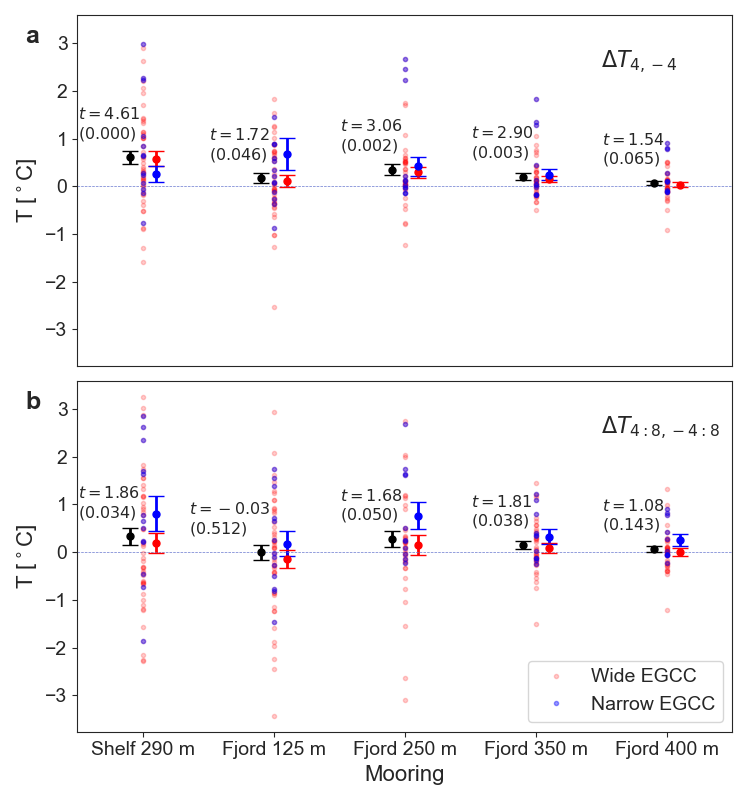

In [30]:
dif4 = sub_ev_storm2[['Shelf290Dif_4d','Fjord125Dif_4d','Fjord250Dif_4d','Fjord350Dif_4d','Fjord400Dif_4d','EGCCwidth']]
ndif4 = dif4[dif4.EGCCwidth<slimE]
wdif4 = dif4[dif4.EGCCwidth>wideE]
ndif4 = ndif4.drop(['EGCCwidth'],axis=1)
wdif4 = wdif4.drop(['EGCCwidth'],axis=1)

dif48 = sub_ev_storm2[['Shelf290Dif_48d','Fjord125Dif_48d','Fjord250Dif_48d','Fjord350Dif_48d','Fjord400Dif_48d','EGCCwidth']]
ndif48 = dif48[dif48.EGCCwidth<slimE]
wdif48 = dif48[dif48.EGCCwidth>wideE]
ndif48 = ndif48.drop(['EGCCwidth'],axis=1)
wdif48 = wdif48.drop(['EGCCwidth'],axis=1)
x_labels = ['Shelf 290 m','Fjord 125 m','Fjord 250 m','Fjord 350 m','Fjord 400 m']

fig, ax = plt.subplots(nrows=2,sharex=True,sharey=True,figsize=(7.5, 8))

a1 = ax[0]
a1.tick_params(labelsize=14,bottom=False)
a1.set_facecolor('white')

for i in [0,1,2,3,4]:
    data = dif4
    y = dif4[dif4.columns[i]].dropna()
    x = np.random.normal(i+1, 0, size=len(y))
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a1.errorbar(i+0.9,ymean,yci,color='k',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    a1.plot(x, y, 'r.', alpha=0.2)
    ttest = scipy.stats.ttest_1samp(data[data.columns[i]].dropna(), 0, alternative='greater')
    a1.text(i+0.505,ymean+0.8,'$\it{t=%.2f}$' %round(ttest.statistic,2),fontsize=11.5)
    a1.text(i+0.505,ymean+0.4,'$\it{(%.3f)}$' %round(ttest.pvalue,3),fontsize=11.5)
    
for i in [0,1,2,3,4]:
    data = wdif4
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a1.errorbar(i+1.1,ymean,yci,color='r',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    
    data = ndif4
    y = data[data.columns[i]].dropna()
    x = np.random.normal(i+1, 0, size=len(y))
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a1.errorbar(i+.1,ymean,yci,color='b',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    a1.plot(x, y, 'b.',alpha=0.4)
a1.hlines(0,0.5,6.5,linewidth=0.5,linestyles='dashed')
a1.text(0.1,3,'a',weight='bold',fontsize=18) 
a1.text(4.5,2.5,'$\Delta T_{4,-4}$',fontsize=16)
a1.set_xlim(0.5,6.5)
a1.set_ylabel('T [$^\circ$C]',fontsize=16)
        

a3 = ax[1]
a3.tick_params(labelsize=14)
a3.set_facecolor('white')
               
for i in [0,1,2,3,4]:
    data = dif48
    y = data[data.columns[i]].dropna()
    x = np.random.normal(i+1, 0, size=len(y))
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a3.errorbar(i+0.9,ymean,yci,color='k',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    ttest = scipy.stats.ttest_1samp(data[data.columns[i]].dropna(), 0, alternative='greater')
    if i == 1:
        a3.text(i+0.355,ymean+0.8,'$\it{t=%.2f}$' %round(ttest.statistic,2),fontsize=11.5)
        a3.text(i+0.355,ymean+0.4,'$\it{(%.3f)}$' %round(ttest.pvalue,3),fontsize=11.5)
    else:
        a3.text(i+0.505,ymean+0.8,'$\it{t=%.2f}$' %round(ttest.statistic,2),fontsize=11.5)
        a3.text(i+0.505,ymean+0.4,'$\it{(%.3f)}$' %round(ttest.pvalue,3),fontsize=11.5)
    if i == 0:
        a3.plot(x, y, 'r.', alpha=0.2,label='Wide EGCC')
    else:
        a3.plot(x, y, 'r.', alpha=0.2,label='_nolegend_')
    
for i in [0,1,2,3,4]:
    data = wdif48
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a3.errorbar(i+1.1,ymean,yci,color='r',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    
    data = ndif48
    y = data[data.columns[i]].dropna()
    x = np.random.normal(i+1, 0, size=len(y))
    ymean = data[data.columns[i]].mean()
    yci = scipy.stats.bootstrap(data[data.columns[i]].dropna().values.reshape(1,-1), np.mean).standard_error
    a3.errorbar(i+1.1,ymean,yci,color='b',marker='o',ms=5,capsize=6,elinewidth=2,markeredgewidth=1,label='_nolegend_')
    if i == 0:
        a3.plot(x, y, 'b.',alpha=0.4,label='Narrow EGCC')
    else:
        a3.plot(x, y, 'b.',alpha=0.4,label='_nolegend_')
    
a3.hlines(0,0.5,7.5,linewidth=0.5,linestyles='dashed')
a3.text(0.1,3,'b',weight='bold',fontsize=18) 
a3.text(4.5,2.5,'$\Delta T_{4:8,-4:8}$',fontsize=16) 
a3.set_xlim(0.5,5.5)
a3.set_xticks(np.arange(1,6,1))
a3.set_xticklabels(x_labels)
a3.set_xlabel('Mooring',fontsize=16)
a3.set_ylabel('T [$^\circ$C]',fontsize=16)

plt.legend(loc='lower right',fontsize=14)
plt.tight_layout()
plt.savefig(fig_dir + 'TempChangePlots20230122.jpg', format='jpg', dpi=400)
plt.show()

In [31]:
# Calculate bootstrap confidence interval
x = dif48['Fjord250Dif_48d'].dropna()
m = x.mean() 
s = x.std() 
dof = len(x)-1
confidence = 0.95
values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(10000)] 
np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

# Calculate t-statistic for determining if different than 0
scipy.stats.ttest_1samp(dif48['Fjord400Dif_48d'].dropna(), 0, alternative='greater')

# Calculate bootstrap confidence interval 
scipy.stats.bootstrap(dif48['Shelf290Dif_48d'].dropna().values.reshape(1,-1), np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.012748213254270774, high=0.6755929736650701), standard_error=0.1756255145275258)

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/1253485209.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = dif48.hist(bins=15,ax=ax)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
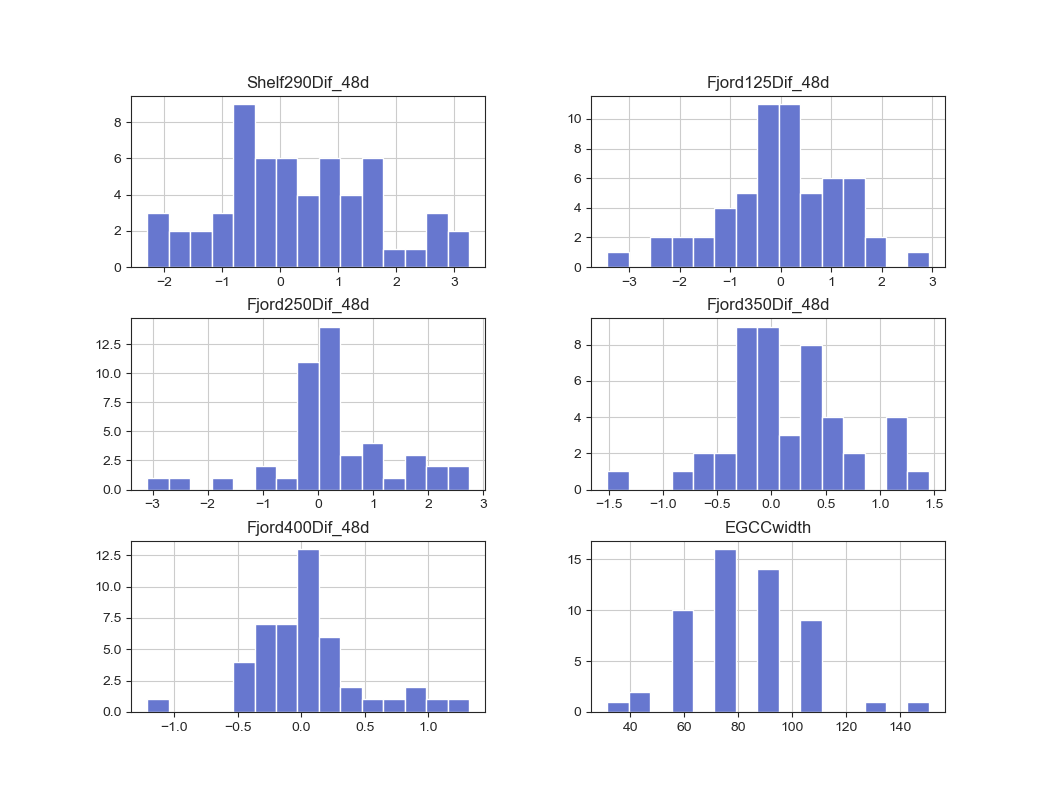

In [32]:
fig, ax = plt.subplots(figsize=(10.5, 8))
hist = dif48.hist(bins=15,ax=ax)

## Figure 6 - Composites

In [33]:
mask = np.array([(sub_ev_storm.Intrusion_visible==1) ]).flatten()
print (str(mask.sum())+' cyclones')
timed_sub = timed[mask]

deg_sub = deg.iloc[:,mask]
wstr_sub = wstr.iloc[:,mask]
ssh_sub = ssh.iloc[:,mask]
moorsh_sub = moorsh.iloc[:,mask]
moor125_sub = moor125.iloc[:,mask]
moor250_sub = moor250.iloc[:,mask]
moor350_sub = moor350.iloc[:,mask]
moor400_sub = moor400.iloc[:,mask]
moor550_sub = moor550.iloc[:,mask]
pres_sub = pres.iloc[:,mask]
vel_sub = vel.iloc[:,mask]
# sst_sub = sst.iloc[:,mask]
# anom_sub = anom.iloc[:,mask]
# ic_sub = ic.iloc[:,mask]

degm2 = deg_sub.mean(axis=1)
wstrm2 = wstr_sub.mean(axis=1)
sshm2 = ssh_sub.mean(axis=1)
moorshm2 = moorsh_sub.mean(axis=1)
moor125m2 = moor125_sub.mean(axis=1)
moor250m2 = moor250_sub.mean(axis=1)
moor350m2 = moor350_sub.mean(axis=1)
moor400m2 = moor400_sub.mean(axis=1)
moor550m2 = moor550_sub.mean(axis=1)
presm2 = pres_sub.mean(axis=1)
velm2 = vel_sub.mean(axis=1)

degerr = deg_sub.sem(axis=1)
wstrerr = wstr_sub.sem(axis=1)
ssherr = ssh_sub.sem(axis=1)
moorsherr = moorsh_sub.sem(axis=1)
moor125err = moor125_sub.sem(axis=1)
moor250err = moor250_sub.sem(axis=1)
moor350err = moor350_sub.sem(axis=1)
moor400err = moor400_sub.sem(axis=1)
moor550err = moor550_sub.sem(axis=1)
preserr = pres_sub.sem(axis=1)
velerr = vel_sub.sem(axis=1)

58 cyclones


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
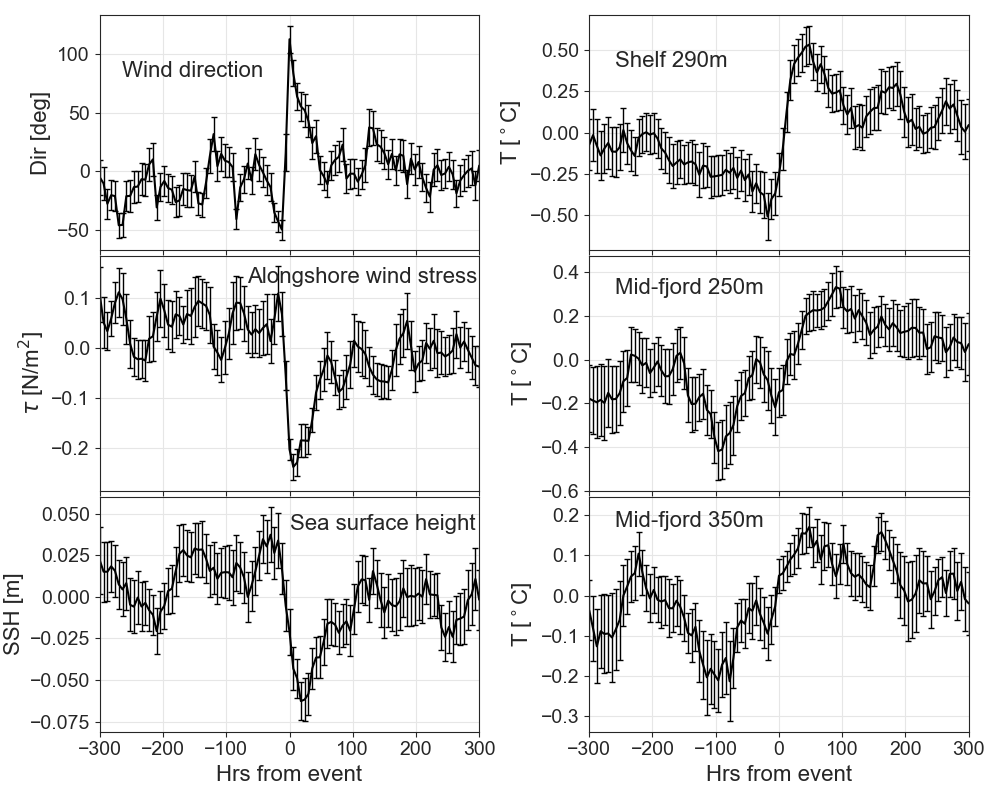

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True,figsize=(10, 8))

a1 = ax[0,0]
a1.tick_params(labelsize=14)
a1.set_facecolor('white')
a1.grid(color='.9')
a1.errorbar(degm2.index,degm2,color='k',yerr=degerr,capsize=2,elinewidth=1,markeredgewidth=1,label='Wind direction')
a1.text(-265,80,'Wind direction',fontsize=16)
a1.set_ylabel('Dir [deg]',fontsize=16)

a8 = ax[1,0]
a8.tick_params(labelsize=14)
a8.set_facecolor('white')
a8.grid(color='.9')
a8.errorbar(wstrm2.index,wstrm2,color='k',yerr=wstrerr,capsize=2,elinewidth=1,markeredgewidth=1,label='Alongshore wind stress')
a8.set_ylabel('$\\tau$ [N/m$^2$]',fontsize=16)
a8.text(-67,0.13,'Alongshore wind stress',fontsize=16)

a2 = ax[2,0]
a2.tick_params(labelsize=14)
a2.set_facecolor('white')
a2.grid(color='.9')
a2.errorbar(sshm2.index,sshm2,color='k',yerr=ssherr,capsize=2,elinewidth=1,markeredgewidth=1,label='Sea surface height')
a2.text(1,0.04,'Sea surface height',fontsize=16) 
a2.set_xlabel('Hrs from event',fontsize=16)
a2.set_ylabel('SSH [m]',fontsize=16) 

a5 = ax[0,1]
a5.tick_params(labelsize=14)
a5.set_facecolor('white')
a5.grid(color='.9')
a5.errorbar(moorshm2.index,moorshm2,color='k',yerr=moorsherr,capsize=2,elinewidth=1,markeredgewidth=1,label='Shelf Mooring')
a5.text(-260,0.4,'Shelf 290m',fontsize=16) 
a5.set_ylabel('T [$^\circ$C]',fontsize=16)

a4 = ax[1,1]
a4.tick_params(labelsize=14)
a4.set_facecolor('white')
a4.grid(color='.9')
a4.errorbar(moor250m2.index,moor250m2,color='k',yerr=moor250err,capsize=2,elinewidth=1,markeredgewidth=1,label='Fjord Mooring 400m')
a4.text(-260,0.3,'Mid-fjord 250m',fontsize=16) 
a4.set_ylabel('T [$^\circ$C]',fontsize=16)

a7 = ax[2,1]
a7.tick_params(labelsize=14)
a7.set_facecolor('white')
a7.grid(color='.9')
a7.errorbar(moor350m2.index,moor350m2,color='k',yerr=moor350err,capsize=2,elinewidth=1,markeredgewidth=1,label='Fjord Mooring 550m')
a7.text(-260,0.17,'Mid-fjord 350m',fontsize=16) 
a7.set_xlim(-300,300)
a7.set_ylabel('T [$^\circ$C]',fontsize=16)
a7.set_xlabel('Hrs from event',fontsize=16)

# plt.subplots_adjust(wspace=0.5)
plt.tight_layout(h_pad=0.05)
plt.savefig(fig_dir + 'WindEventComposite.jpg', format='jpg', dpi=1000)
plt.show()

## Figure S2 bottom panel - Example mooring timeseries

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
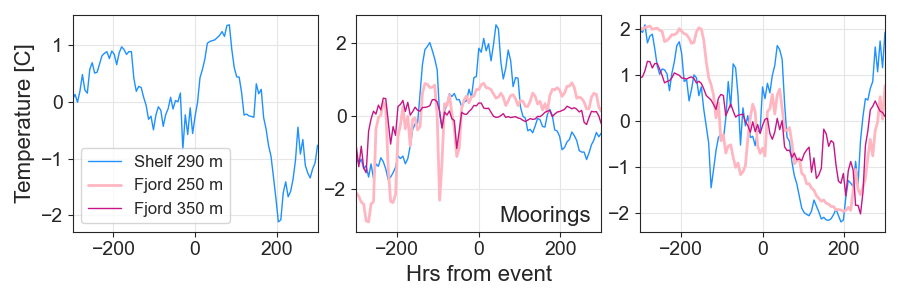

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True,figsize=(9, 3))
d1 = [i for i in range(timed_sub.shape[0]) if f'{timed_sub[i].year}-{timed_sub[i].month}-{timed_sub[i].day}'=='2010-4-16'][0]
d2 = [i for i in range(timed_sub.shape[0]) if f'{timed_sub[i].year}-{timed_sub[i].month}-{timed_sub[i].day}'=='2011-4-19'][0]
d3 = [i for i in range(timed_sub.shape[0]) if f'{timed_sub[i].year}-{timed_sub[i].month}-{timed_sub[i].day}'=='2013-3-1'][0]

a8 = ax[0]
a8.tick_params(labelsize=14)
a8.set_facecolor('white')
a8.grid(color='.9')
a8.plot(moorsh_sub.iloc[:,d1],color='dodgerblue',linewidth=1,label='Shelf 290 m')
a8.plot(moor250_sub.iloc[:,d1],color='lightpink',linewidth=2,label='Fjord 250 m')
a8.plot(moor350_sub.iloc[:,d1],color='mediumvioletred',linewidth=1,label='Fjord 350 m')
a8.set_xlim([-300,300])
a8.set_ylabel('Temperature [C]',fontsize=16)
a8.legend(fontsize=12)

a5 = ax[1]
a5.tick_params(labelsize=14)
a5.set_facecolor('white')
a5.grid(color='.9')
a5.plot(moorsh_sub.iloc[:,d2],color='dodgerblue',linewidth=1,label='_nolegend_')
a5.plot(moor250_sub.iloc[:,d2],color='lightpink',linewidth=2,label='_nolegend_')
a5.plot(moor350_sub.iloc[:,d2],color='mediumvioletred',linewidth=1,label='_nolegend_')
a5.text(50,-2.9,'Moorings',fontsize=16)
a5.set_xlabel('Hrs from event',fontsize=16)

a4 = ax[2]
a4.tick_params(labelsize=14)
a4.set_facecolor('white')
a4.grid(color='.9')
a4.plot(moorsh_sub.iloc[:,d3],color='dodgerblue',linewidth=1,label='n_nolegend_')
a4.plot(moor250_sub.iloc[:,d3],color='lightpink',linewidth=2,label='_nolegend_')
a4.plot(moor350_sub.iloc[:,d3],color='mediumvioletred',linewidth=1,label='_nolegend_') # linestyle='--',

plt.tight_layout(w_pad=0.05)
plt.savefig(fig_dir + 'ExamplesMooring20220307.jpg', format='jpg', dpi=1000)
plt.show()

# Figure S4 - Mooring variability on shelf

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

0.17033139343410592
0.39756287407159696


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
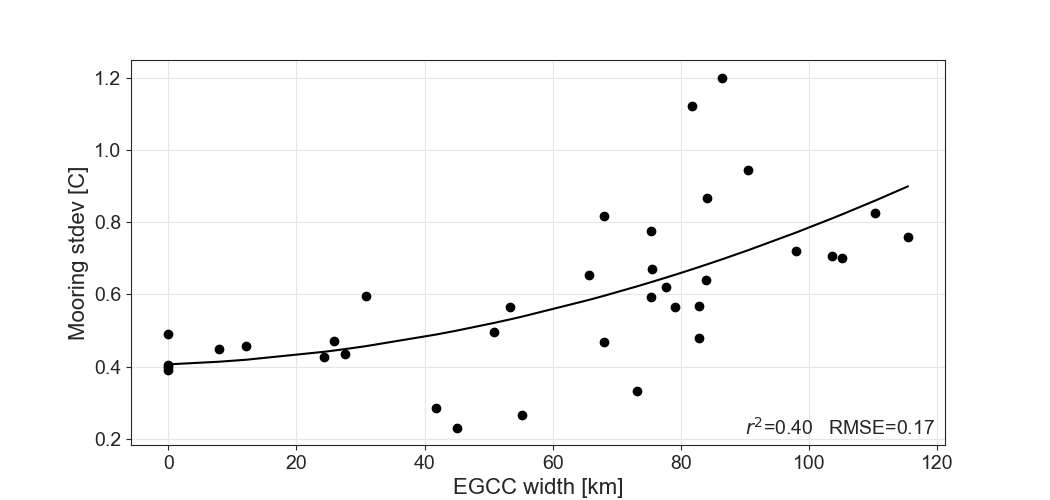

In [37]:
moorstdev = era5WindH['2010':'2013'][['Tempshelf290m','Tempmid250m']].resample('W-SAT').std()
moorstdev = pd.concat([moorstdev,nonansW['2010':'2013']['EGCCwidth']],axis=1)
moorstdev = moorstdev.resample('MS').mean()
moorstdev = moorstdev.dropna(axis=0)
moorstdev = moorstdev.sort_values(by=['EGCCwidth'])

x = np.array(moorstdev['EGCCwidth'].values).ravel()
y = np.array(moorstdev['Tempshelf290m'].values).ravel()

model = np.poly1d(np.polyfit(x,y,2))
y_poly_pred = model(x)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print (rmse)
print (r2)


fig, ax = plt.subplots(figsize=(10.5, 5))

a1 = ax
a1.tick_params(labelsize=14)
a1.set_facecolor('white')
a1.grid(color='.9')
a1.scatter(x,y,color='k',zorder=2,label='Shelf 290m')
a1.plot(x,y_poly_pred,color='k',zorder=2,label='Polynomial Fit')
a1.text(90,0.21,'$r^2$=0.40   RMSE=0.17',fontsize=14)
a1.set_ylabel('Mooring stdev [C]',fontsize=16)
a1.set_xlabel('EGCC width [km]',fontsize=16)

plt.savefig(fig_dir+'EGCCwidthvMooring.jpg', format='jpg', dpi=400)
plt.show()

# Table 1

In [38]:
sub_ev_storm[sub_ev_storm['Intrusion_visible']==True][['MODIS_sighting','WindStrDuration','Piteraq','EGCCwidth']]
fortable = sub_ev_storm2
fortable.LP_wind_influence = fortable.LP_wind_influence.astype('int')
fortable.HP_wind_influence = fortable.HP_wind_influence.astype('int')
fortable['sep'] = '&'
fortable['slash'] = '\ '
fortable['EGCCwidth'] = fortable['EGCCwidth'].round(1)
print (fortable[fortable['Intrusion_visible']==True][['sep','MODIS_sighting','sep','Piteraq','sep','LP_wind_influence','sep','HP_wind_influence','sep','EGCCwidth','slash']].to_string())

                    sep MODIS_sighting sep  Piteraq sep  LP_wind_influence sep  HP_wind_influence sep  EGCCwidth slash
Datetime                                                                                                              
2010-01-23 18:00:00   &     2010-01-24   &        1   &                  1   &                  0   &       75.5    \ 
2010-02-16 06:00:00   &     2010-02-17   &        0   &                  1   &                  1   &       75.5    \ 
2010-03-05 06:00:00   &     2010-03-05   &        1   &                  1   &                  0   &       75.5    \ 
2010-03-11 18:00:00   &     2010-03-12   &        0   &                  1   &                  1   &       90.1    \ 
2010-03-14 18:00:00   &     2010-03-15   &        0   &                  1   &                  0   &       90.1    \ 
2010-03-25 18:00:00   &     2010-03-26   &        0   &                  1   &                  0   &       60.6    \ 
2010-03-30 06:00:00   &     2010-03-31   &      

/Users/tsnow/Documents/condaenv/env/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3129418942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortable['sep'] = '&'
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3129418942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [39]:
# Create data files for publication
tb1_file = moor_dir + 'Variables/TableS1_20230115.csv'
fortable[fortable['Intrusion_visible']==True][['MODIS_sighting','Piteraq','LP_wind_influence','HP_wind_influence','EGCCwidth','cylat', 'cylong','cystormdist']].to_csv(tb1_file)
other_data_file = moor_dir + 'Variables/winds_ocean_20230115.csv'
era5WindH[['ERA5WindSpd','ERA5WindU', 'ERA5WindV', 'ERA5WindUSW', 'ERA5WindVSW', 'ERA5WindDeg','ERA5PitSpd', 'ERA5PitU', 'ERA5PitV','ERA5PitDeg', 
           'ERA5PitEvents', 'ERA5BarSpd', 'ERA5BarU', 'ERA5BarV','ERA5BarDeg','ERA5BarEvents','ERA5Stress', 'ERA5StressU', 'ERA5StressV', 'ERA5StressDeg',
           'ERA5StressUSW', 'ERA5StressVSW','Tempshelf290m', 'Tempmid125m','Tempmid250m','Tempmid350m','Tempmid400m','Tempmid550m','Tempmid650m',
           'SSH']].loc['2010':'2013'].to_csv(other_data_file)

# Figure 4 - msl pressure and wind field

In [40]:
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [41]:
latboundsA = [ 57 , 75 ] # Irminger Current
lonboundsA = [ -60 , -10 ] 

llcrnrlatA=58;urcrnrlatA=72;llcrnrlonA=-45;urcrnrlonA=-15 # Entire S. Greenland

In [42]:
# Bed Machine Greenland bathymetry

# Extract variables
lonsb = bedmach.variables['x']
latsb = bedmach.variables['y']
bathy = bedmach.variables['bed']
bathy = bathy[10000:17500,5000:10000]

x_b,y_b = np.meshgrid(lonsb,latsb[::-1])
inProj =pyproj.Proj(init='EPSG:3413')
outProj =pyproj.Proj(init='EPSG:4326')
x_b,y_b = pyproj.transform(inProj,outProj,x_b,y_b)
x_b = np.flipud(x_b)[10000:17500,5000:10000]
y_b = np.flipud(y_b)[10000:17500,5000:10000]

/Users/tsnow/Documents/condaenv/env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/tsnow/Documents/condaenv/env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/533903354.py:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/go

In [43]:
# ERA-5 Wind fields taken for designated box on every day in ERA files to eventually make timeseries - every 6 hrs
# Wind deg = direction from, U/V going towards - wind deg of 60 is along shore winds that are -U and -V
# Winds SW = V is pos with alongshore winds and windDegSW will be 180

# Get lats and lons and spatial sampling box indices here because same for every image
yearStart = 2009
yearEnd = 2013
monthStart = 1
monthEnd = 12

ref = os.listdir(bdir)[1]
fhref = Dataset(bdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indsb = np.where((lat_era > latboundsA[0]) & (lat_era < latboundsA[1]))
lon_indsb = np.where((lon_era > lonboundsA[0]) & (lon_era < lonboundsA[1]))
lat_sub = lat_era[lat_indsb[0]]
lon_sub = lon_era[lon_indsb[0]]
x_W,y_W = np.meshgrid(lon_sub,lat_sub)

try:
    del temp_array,windspd_array,windu_array,windv_array,pres_array,time_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = bdir + "/era5_daily_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        temp_era = era.variables['t2m'][:,lat_indsb[0],lon_indsb[0]]
        windu_era = era.variables['u10'][:,lat_indsb[0],lon_indsb[0]]
        windv_era = era.variables['v10'][:,lat_indsb[0],lon_indsb[0]]
        windspd_era = np.sqrt(windu_era**2 + windv_era**2)
        
        time_era= era.variables['time']
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))
        
        filep_era = pdir + "/era5_daily_mslpressure_%04d%02d.nc" % (year, month)
        pera = Dataset(filep_era, mode='r')
        pres_era = pera.variables['msl'][:,lat_indsb[0],lon_indsb[0]]

        try:
            temp_array = np.dstack((temp_array, np.moveaxis(temp_era, 0, -1)))
            windspd_array = np.dstack((windspd_array, np.moveaxis(windspd_era, 0, -1)))
            windu_array = np.dstack((windu_array, np.moveaxis(windu_era, 0, -1)))
            windv_array = np.dstack((windv_array, np.moveaxis(windv_era, 0, -1)))
            pres_array = np.dstack((pres_array, np.moveaxis(pres_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            temp_array = np.moveaxis(temp_era, 0, -1)
            windspd_array = np.moveaxis(windspd_era, 0, -1)
            windu_array = np.moveaxis(windu_era, 0, -1)
            windv_array = np.moveaxis(windv_era, 0, -1)
            pres_array = np.moveaxis(pres_era, 0, -1)
            time_array = time_eraconv
        era.close()
        pera.close()


In [44]:
# Subset full atm timeseries down to dates around events
try:
    del temp_sub, windspd_sub, windu_sub, windv_sub, pres_sub, time_sub
except:
    print('No variables to delete')

time_array2 = pd.DataFrame(time_array)

for event in sub_ev_storm2.index:
#     eventend = event+dt.timedelta(hours=endhr)
    eventend = event
    print (eventend)
    idx = [time_array2[time_array2[0]==eventend-dt.timedelta(hours=i)] for i in range(-6*14,6*11+1,6)] 
    try:
        temp_sub = np.dstack((temp_sub,temp_array[:,:,idx[-1].index[0]:idx[0].index[0]]))
        windspd_sub = np.dstack((windspd_sub,windspd_array[:,:,idx[-1].index[0]:idx[0].index[0]]))
        windu_sub = np.dstack((windu_sub,windu_array[:,:,idx[-1].index[0]:idx[0].index[0]]))
        windv_sub = np.dstack((windv_sub,windv_array[:,:,idx[-1].index[0]:idx[0].index[0]]))
        pres_sub = np.dstack((pres_sub,pres_array[:,:,idx[-1].index[0]:idx[0].index[0]]))
        time_sub = np.concatenate((time_sub,time_array[idx[-1].index[0]:idx[0].index[0]]))
    except:
        temp_sub = temp_array[:,:,idx[-1].index[0]:idx[0].index[0]]
        windspd_sub = windspd_array[:,:,idx[-1].index[0]:idx[0].index[0]]
        windu_sub = windu_array[:,:,idx[-1].index[0]:idx[0].index[0]]
        windv_sub = windv_array[:,:,idx[-1].index[0]:idx[0].index[0]]
        pres_sub = pres_array[:,:,idx[-1].index[0]:idx[0].index[0]]
        time_sub = time_array[idx[-1].index[0]:idx[0].index[0]]

No variables to delete
2010-01-23 18:00:00
2010-02-16 06:00:00
2010-03-05 06:00:00
2010-03-11 18:00:00
2010-03-14 18:00:00
2010-03-25 18:00:00
2010-03-30 06:00:00
2010-04-06 12:00:00
2010-04-11 12:00:00
2010-04-16 18:00:00
2010-04-30 12:00:00
2010-05-05 18:00:00
2011-01-24 18:00:00
2011-02-15 12:00:00
2011-02-25 18:00:00
2011-03-03 00:00:00
2011-03-06 06:00:00
2011-03-25 18:00:00
2011-04-11 00:00:00
2011-04-14 06:00:00
2011-04-19 06:00:00
2011-05-07 06:00:00
2011-05-27 18:00:00
2011-06-01 18:00:00
2011-06-15 12:00:00
2012-01-19 12:00:00
2012-01-25 18:00:00
2012-01-29 12:00:00
2012-02-08 00:00:00
2012-02-15 00:00:00
2012-03-09 06:00:00
2012-03-14 00:00:00
2012-03-27 06:00:00
2012-04-03 00:00:00
2012-04-13 00:00:00
2012-04-27 06:00:00
2012-05-02 18:00:00
2012-05-25 12:00:00
2012-06-11 06:00:00
2012-06-18 00:00:00
2012-06-25 00:00:00
2013-01-28 18:00:00
2013-02-04 12:00:00
2013-02-09 12:00:00
2013-03-01 06:00:00
2013-03-12 00:00:00
2013-03-21 18:00:00
2013-04-08 18:00:00
2013-04-23 00:00:

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/3839410144.py:14: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (plot_date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


2013-03-02T00:00:00.000000000


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
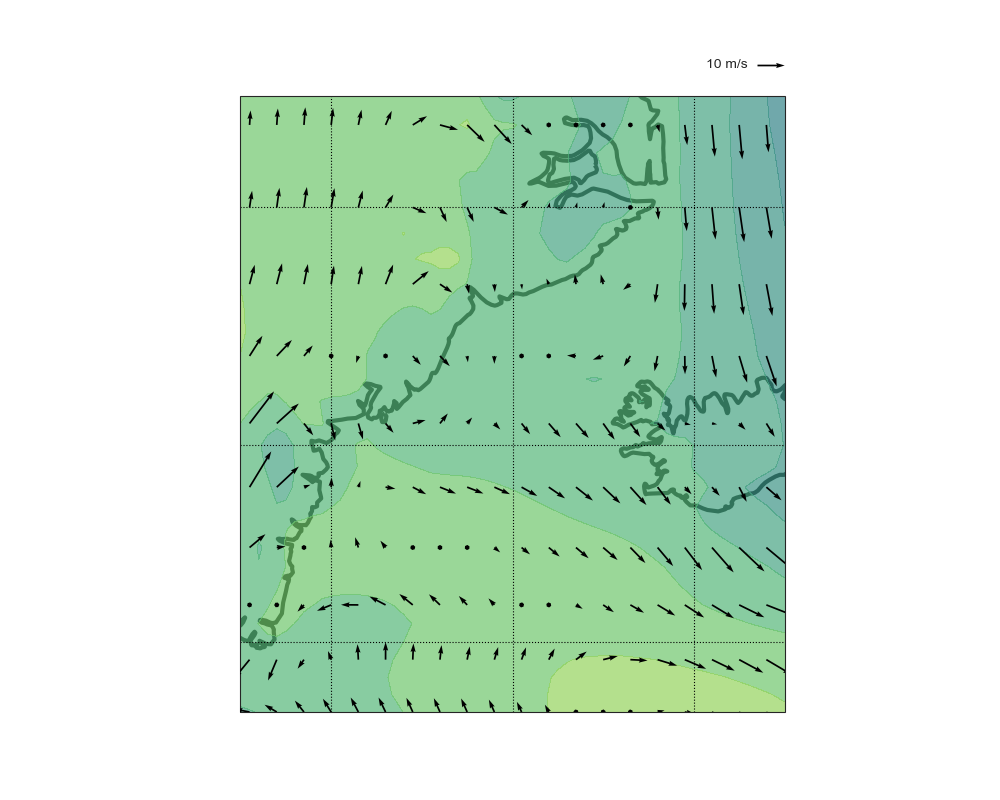

In [45]:
# ERA-5 wind and msl pressure for Figure 4 of paper
# Each t should be run separately

t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-02-28 18:00:00')]
t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-03-01 00:00:00')]
t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-03-01 06:00:00')]
t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-03-01 12:00:00')]
t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-03-01 18:00:00')]
t = [i for i,t in enumerate(time_sub) if t==np.datetime64('2013-03-02 00:00:00')]

t = t[0]

plot_date = time_sub[t]
ts = (plot_date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
plot_date = datetime.utcfromtimestamp(ts)
year = str(plot_date.year)
month = str(plot_date.month).zfill(2)
day = str(plot_date.day).zfill(2)
dt_date = dt.datetime(plot_date.year,plot_date.month,plot_date.day,plot_date.hour)#.to_datetime64()


fig = plt.subplots(figsize=(10,8))
plt.axis('off')

ax = plt.axes(projection=ccrs.Mercator(central_longitude=-40))
ax.set_extent([llcrnrlonA, urcrnrlonA, llcrnrlatA, urcrnrlatA], crs=cartopy.crs.PlateCarree())

x, y = x_W,y_W
gl = ax.gridlines(draw_labels=False,xlocs=[-60,-50,-40,-30,-20,-10],ylocs=[55,60,65,70,75],y_inline=False,color='k',linestyle=':')
ax.coastlines(resolution='50m',linewidth=3)

plt.contourf(x,y,pres_sub[:,:,t],alpha=0.7,vmax=104500,vmin=99000,cmap=cmocean.cm.haline,transform=cartopy.crs.PlateCarree(),zorder=2)#,vmax=104500,vmin=99000
windu_t = windu_sub[:,:,t]
windv_t = windv_sub[:,:,t]
Q = ax.quiver(x[::3,::3],y[::3,::3],windu_t[::3,::3],windv_t[::3,::3],edgecolors='k',facecolor='k',headwidth=3,headlength=5,minlength=3,scale=200,transform=cartopy.crs.PlateCarree(),zorder=3) # can put meanwindspd in 5 spot to color arrows
qk = plt.quiverkey(Q,0.95,1.05,10,'10 m/s',labelpos='W') #, scale_units='meters'


dt_date = pd.to_datetime(dt_date,format='%Y%m%d%H%M').to_datetime64()
print(dt_date)
# plt.colorbar()

plt.savefig((fig_dir + 'MSLPressureWindnarrow%4d%02d%02d%02d.jpg' %(plot_date.year,plot_date.month,plot_date.day,plot_date.hour)), format='jpg', dpi=600)

plt.show()

In [46]:
latboundsA = [ 50 , 75 ] # Irminger Current
lonboundsA = [ -60 , -10 ] 

llcrnrlatA=51;urcrnrlatA=72;llcrnrlonA=-45;urcrnrlonA=-15 # Entire S. Greenland

In [47]:
def wind_subplot(location,t):
    locrow = location[0]
    loccol = location[1]
    a1 = axs[locrow,loccol]
    
    plot_date = time_sub[t]
    ts = (plot_date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    plot_date = datetime.utcfromtimestamp(ts)
    year = str(plot_date.year)
    month = str(plot_date.month).zfill(2)
    day = str(plot_date.day).zfill(2)
    dt_date = dt.datetime(plot_date.year,plot_date.month,plot_date.day,plot_date.hour)

    x, y = x_W,y_W
    gl = a1.gridlines(draw_labels=False,xlocs=[-60,-50,-40,-30,-20,-10],ylocs=[55,60,65,70,75],y_inline=False,color='k',linestyle=':')
    a1.coastlines(resolution='50m',linewidth=3)

    a1.contourf(x,y,pres_sub[:,:,t],alpha=0.7,vmax=hp,vmin=lp,cmap=cmocean.cm.haline,transform=cartopy.crs.PlateCarree(),zorder=2)#,vmax=104500,vmin=99000
    # plt.colorbar()
    windu_t = windu_sub[:,:,t]
    windv_t = windv_sub[:,:,t]
    # Q = ax.quiver(x,y,windu_t,windv_t,edgecolors='k',facecolor='k',headwidth=3,headlength=5,minshaft=0.5,scale=350,transform=cartopy.crs.PlateCarree(),zorder=3) # can put meanwindspd in 5 spot to color arrows
    Q = a1.quiver(x[::3,::3],y[::3,::3],windu_t[::3,::3],windv_t[::3,::3],edgecolors='k',facecolor='k',headwidth=3,headlength=5,minlength=3,scale=200,transform=cartopy.crs.PlateCarree(),zorder=3) # can put meanwindspd in 5 spot to color arrows
#     qk = a1.quiverkey(Q,0.95,1.05,10,'10 m/s',labelpos='W') #, scale_units='meters'

    ttl = str(np.datetime64(plot_date,'h'))
    a1.set_title(ttl[0:10]+' '+ttl[11:]+'H')
    return a1

2013-05-23T12:00:00.000000000


/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/1935501940.py:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (plot_date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
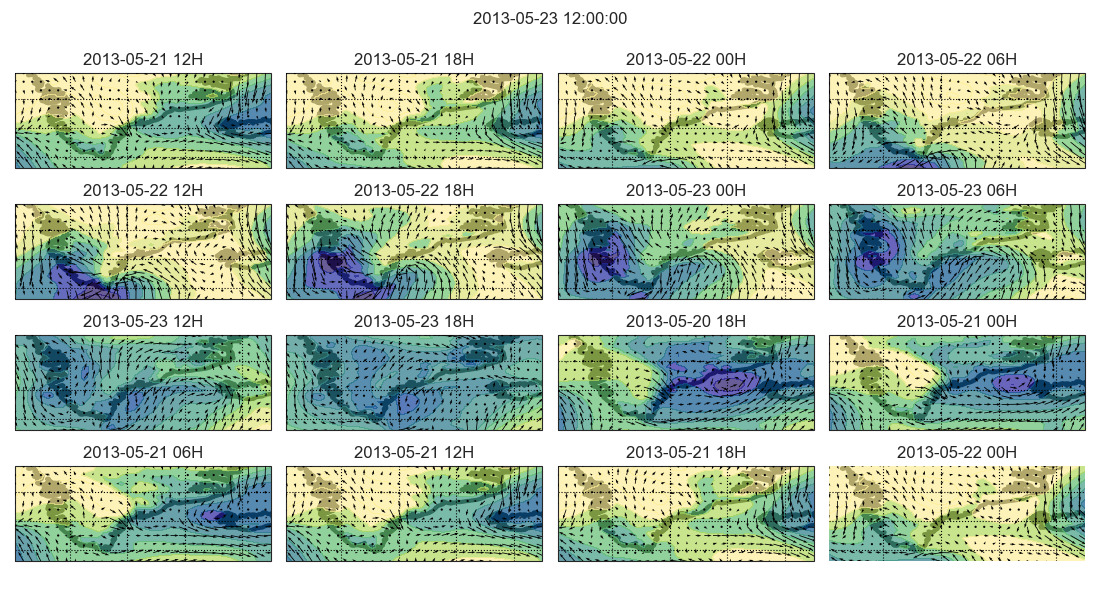

In [48]:
for event in sub_ev_storm2.iloc[-5:-4].index:
    print(pd.to_datetime(event,format='%Y%m%d%H%M').to_datetime64())
    to = [i for i,t in enumerate(time_sub) if t==np.datetime64(event)][0]

    # Setting scale ranges for air pressure and wind speed
    hp = np.max([pres_sub[:,:,to].max(),pres_sub[:,:,to-4].max(),pres_sub[:,:,to+4].max(),pres_sub[:,:,to-7].max()])-600
    lp = np.min([pres_sub[:,:,to].min(),pres_sub[:,:,to-4].min(),pres_sub[:,:,to+4].min(),pres_sub[:,:,to-7].min()])+600
    windscale = 350

    fig, axs = plt.subplots(nrows=4,ncols=4,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(11,6))
    plt.axis('off')
    plt.suptitle(event)
    
    wind_subplot([0,0],to-8)
    wind_subplot([0,1],to-7)
    wind_subplot([0,2],to-6)
    wind_subplot([0,3],to-5)
    wind_subplot([1,0],to-4)
    wind_subplot([1,1],to-3)
    wind_subplot([1,2],to-2)
    wind_subplot([1,3],to-1)
    wind_subplot([2,0],to-0)
    wind_subplot([2,1],to+1)
    wind_subplot([2,2],to+2)
    wind_subplot([2,3],to+3)
    wind_subplot([3,0],to+4)
    wind_subplot([3,1],to+5)
    wind_subplot([3,2],to+6)
    wind_subplot([3,3],to+7)

    plt.tight_layout(h_pad=0.02)
    plt.savefig((fig_dir + f'WindEventTimeseries/WindEv%4d%02d%02d.jpg' %(event.year,event.month,event.day)), format='jpg', dpi=300)
  
    plt.show()

# Figure 2 - In situ MIT weather station winds vs. ERA5 winds

In [49]:
def corr_prep(wsshd,data1,data2,freq=0.0025):
    # Calculate and remove seasonal variability and trend 
    # Period is over 1460 because there are 4 measurements per day in 365 days
    result1 = seasonal_decompose(wsshd[data1],model='additive',period=1460)
    wsshd[data1+'_seas'] = result1.seasonal.values
    datab = np.array(wsshd[data1+'_seas'])
    datab = np.concatenate([datab[-400:],datab,datab[:400]])
    wsshd[data1+'_seasfilt'] = butterworth(datab,freq)[400:-400]
    wsshd[data1+'_tr'] = result1.trend.values

    result2 = seasonal_decompose(wsshd[data2],model='additive',period=1460)
    wsshd[data2+'_seas'] = result2.seasonal.values
    datab = np.array(wsshd[data2+'_seas'])
    datab = np.concatenate([datab[-400:],datab,datab[:400]])
    wsshd[data2+'_seasfilt'] = butterworth(datab,freq)[400:-400]
    wsshd[data2+'_tr'] = result2.trend.values

    wsshd = wsshd.dropna()

    datab = np.array(wsshd[data1+'_tr'])
    datab = np.concatenate([datab[-400:],datab,datab[:400]])
    wsshd[data1+'_trfilt'] = butterworth(datab,freq)[400:-400]
    wsshd[data1+'_dt'] = wsshd[data1] - wsshd[data1+'_trfilt'] - wsshd[data1+'_seasfilt']
    wsshd[data1+'_norm'] = (wsshd[data1+'_dt'] - wsshd[data1+'_dt'].mean())/wsshd[data1+'_dt'].std()

    datab = np.array(wsshd[data2+'_tr'])
    datab = np.concatenate([datab[-400:],datab,datab[:400]])
    wsshd[data2+'_trfilt'] = butterworth(datab,freq)[400:-400]
    wsshd[data2+'_dt'] = wsshd[data2] - wsshd[data2+'_trfilt'] - wsshd[data2+'_seasfilt']
    wsshd[data2+'_norm'] = wsshd[data2+'_dt'] - wsshd[data2+'_dt'].mean()/wsshd[data2+'_dt'].std()
    
    return wsshd[[data1+'_norm',data2+'_norm']]
    
def butterworth(data1,frequency_cutoff):
    ### Butterworth filter
    ### Remove all frequencies smaller than 0.01 (i.e., all periods longer than 100 days).  
    xa=data1-np.mean(data1)

    frequency_cutoff_in_days=1/(frequency_cutoff)
    print("frequency_cutoff: "+str(frequency_cutoff))
    print("frequency_cutoff_in_timesteps: "+str(frequency_cutoff_in_days))

    ### Apply a Butterworth filter (recursive filter) to the data
    N = 2 ## order
    Wn = frequency_cutoff*2 ## scalar given the critical frequency (all higher frequencies are removed)
    ## Note: Wn is normalized from 0 to 1, where 1 is the Nyquist frequency, pi radians/sample. 
    ## Note: (Wn is thus in half-cycles / sample.) 
    b, a = signal.butter(N, Wn,btype='lowpass')
    y = signal.filtfilt(b,a,xa) ## one filter forward, one filter backward - you are filtering twice
    return (y + np.mean(data1))

def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = stats.pearsonr(df[r], df[c])[1]
    return pvalues[df.columns[1]][0]

def autocorr(df, lag, twosided=True): # tapered=True):
    """
    Return (lags, ac), where ac is the estimated autocorrelation 
    function for x, at the full set of possible lags.
    
    If twosided is True, all lags will be included;
    otherwise (default), only non-negative lags will be included.

    If tapered is True (default), the low-MSE estimate, linearly
    tapered to zero for large lags, is returned.
    """
    x = df[df.columns[0]]
    y = df[df.columns[1]]
    nx = len(x)
    xdm = x - x.mean()
    ydm = y - y.mean()
    #     ac = np.correlate(xdm, ydm, mode='full')
    ac = np.zeros((lag+lag,))
    pws = np.zeros((lag+lag,))
    for i,l in enumerate(np.arange(-lag,lag)):
        ac[i] = crosscorr(xdm, ydm, lag=l)
        pws[i] = calculate_pvalues(df)
#         ac[i] = stats.pearsonr(stats.zscore(xdm[l:]),stats.zscore(ydm.shift(l)[l:]))
    lags = np.arange(-lag, lag)
    if twosided:
        return lags, ac, pws
    else:
        return lags[lag:], ac[lag:], pws[lag:]

def edof_calc(data1):
    '''
    From https://www.earthinversion.com/geophysics/estimation-degrees-of-freedom/
    and Panofsky and Brier, 1958
    '''
    for i,val in enumerate(acf(data1,nlags=500)):
        if val < 1/np.exp(1):
#             print(i,val) # this tells the point at which don't have correlation-how many time steps
            Te = i
            val_Te = val
            break
    if 'Te' in locals():
        dof = (len(data1)*1)/(2*Te)
    else:
        dof = np.nan
    return dof

def edof_sel(edof1,edof2,method='min'):
    '''
    Chooses method for determining the total edof for crosscorrelation where you have 2
    min = most conservative
    max then pathagorian theorum
    model = least conservative
    '''
    if method=='min':
        edof = min(edof1,edof2)
        return edof
    elif method=='max':
        edof = max(edof1,edof2)
        return edof
    elif method=='pathag':
        edof = np.sqrt(edof1**2+edof2**2)
        return edof
    elif method=='model':
        edof = edof1+edof2-2
        return edof

In [50]:
mit = pd.read_csv(mit_file,sep='\s+',na_values=-999)
mit = mit.rename(columns={'Year': 'year','MonthOfYear':'month','DayOfMonth':'day','HourOfDay(UTC)':'hour'}) #({'year': mit['Year'],'month': mit['MonthOfYear'],'day': mit['DayOfMonth'],'hour' : mit['HourOfDay(UTC)']})
mit['Datetime'] = pd.to_datetime(mit[['year','month','day','hour']],format = '%Y%m%d%H') 
mit = mit.set_index('Datetime')
mit = mit[['WindSpeed(m/s)','WindDirection(d)']].loc['2010':'2013']
mit = mit.rename(columns={'WindSpeed(m/s)':'MitWindSpd','WindDirection(d)':'MitWindDir'})
mit = mit.resample("6H").mean()

mit.head(2)

,MitWindSpd,MitWindDir
Datetime,,
2010-01-01 00:00:00,NaN,NaN
2010-01-01 06:00:00,NaN,NaN


In [51]:
# ERA-5 Winds averaged for designated box to make timeseries - every 6 hrs

# Desired dates and lat/lon for ERA sampling
# For MIT weather station: (65.69, -37.828)
latboundsmit = [ 65.5, 65.9]
lonboundsmit = [ -38. , -37.65 ]

yearStart = 2010
yearEnd = 2013
monthStart = 1
monthEnd = 12

meanmitspd = []
meanmitu = []
meanmitv = []
time_array = []

# Get lats and lons and spatial sampling box indices here because same for every image
ref = os.listdir(bdir)[1]
fhref = Dataset(bdir+ref, mode='r')  
lat_era = fhref.variables['latitude'][:]
if fhref.variables['longitude'][0] > 0:
    lon_era = fhref.variables['longitude'][:]-360
else:
    lon_era = fhref.variables['longitude'][:]
lat_indsmit = np.where((lat_era >= latboundsmit[0]) & (lat_era <= latboundsmit[1]))
lon_indsmit = np.where((lon_era >= lonboundsmit[0]) & (lon_era <= lonboundsmit[1]))


try:
    del time_array,mitspd_array,mitu_array,mitv_array
except:
    print ('no old variable to delete')

for year in list(range(yearStart, yearEnd + 1)):
    for month in list(range(monthStart, monthEnd + 1)):
        file_era = bdir + "era5_daily_%04d%02d.nc" % (year, month)
        era = Dataset(file_era, mode='r')
        time_era = era.variables['time']
#         print (year, month)
        
        mitu_era = era.variables['u10'][:,lat_indsmit[0],lon_indsmit[0]]
        mitv_era = era.variables['v10'][:,lat_indsmit[0],lon_indsmit[0]]
        mitspd_era = np.sqrt(mitu_era**2 + mitv_era**2)
        
        time_eraconv = pd.to_datetime(netCDF4.num2date(time_era[:], time_era.units, time_era.calendar,only_use_cftime_datetimes=False))

        
        try:
            mitspd_array = np.dstack((mitspd_array, np.moveaxis(mitspd_era, 0, -1)))
            mitu_array = np.dstack((mitu_array, np.moveaxis(mitu_era, 0, -1)))
            mitv_array = np.dstack((mitv_array, np.moveaxis(mitv_era, 0, -1)))
            time_array = np.concatenate([time_array,time_eraconv],axis=0)
        except:
            mitspd_array = np.moveaxis(mitspd_era, 0, -1)
            mitu_array = np.moveaxis(mitu_era, 0, -1)
            mitv_array = np.moveaxis(mitv_era, 0, -1)
            time_array = time_eraconv
        era.close()

meanmitspd = np.nanmean(mitspd_array,axis=tuple([0,1]))
meanmitu = np.nanmean(mitu_array,axis=tuple([0,1]))
meanmitv = np.nanmean(mitv_array,axis=tuple([0,1]))

era5mitWindH = pd.concat([pd.DataFrame(time_array,columns=['Datetime']),pd.DataFrame(meanmitspd,columns=['ERA5MitSpd']),pd.DataFrame(meanmitu,columns=['ERA5MitU']),pd.DataFrame(meanmitv,columns=['ERA5MitV'])],axis=1)
era5mitWindH = era5mitWindH.set_index('Datetime')
era5mitWindH = era5mitWindH.loc[~era5mitWindH.index.duplicated(keep='first')]
era5mitWindH = pd.concat([era5mitWindH['2010':'2013'],mit['2010':'2013']],axis=1)

era5mitWindH.head(2)

no old variable to delete


,ERA5MitSpd,ERA5MitU,ERA5MitV,MitWindSpd,MitWindDir
Datetime,,,,,
2010-01-01 00:00:00,5.701194,5.694194,-0.282430,NaN,NaN
2010-01-01 06:00:00,6.439273,5.605319,-3.169327,NaN,NaN


In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import statsmodels.formula.api as sm
from scipy import stats

freq1 = 0.0025 # 100 day (400 time steps)
# filtx = '_filt'
filtx = ''
# corrx = ''
corrx = '_norm' # if doing corr_prep to remove trend and seas variability
lag = 200
method = 'min' # for edof calculation 'min' gives most conservative,then max, pathag, and model gives least conservative

data1 = 'ERA5MitSpd'+filtx
data2 = 'MitWindSpd'+filtx
evm1 = era5mitWindH[[data1,data2]].dropna() 
evm = corr_prep(evm1,data1,data2,freq=0.0025)
lagevm, acevm, pevm = autocorr(evm,lag=lag,twosided=False)
edof1 = np.around(edof_calc(evm[data1+corrx]),0)
edof2 = np.around(edof_calc(evm[data2+corrx]),0)
print(edof1,edof2)
sig = np.sqrt(1/edof_sel(edof1,edof2,method)) # sigma squared = 1/n where n is the edof
C99evm = 2.6*sig
C95evm = 2.0*sig

wbias = evm1[data1].mean()-evm1[data2].mean()

# +h means y leads x
print ('\033[4mERA-5 winds correlated with PROMICE observations\033[0m')

# Max positive correlation index
maxl = lagevm[acevm.argmax()]
minl = lagevm[acevm.argmin()]

# 6 hr lag
print ('Max pos correlation and lag: '+str(round(acevm[maxl],2))+', '+str(lagevm[maxl]*6)+' hrs')
print ('Max r='+str(round(acevm[maxl],3))+' p='+str(round(pevm[maxl],4)))
print (str(minl)+' Min r='+str(round(acevm[minl],3))+' p='+str(round(pevm[minl],4)))
print ('C99 = '+str(C99evm))
print ('C95 = '+str(C95evm))
print ('')
print (f'Mean bias: ERA-5 is {round(wbias,2)} m/s from PROMICE obs')

frequency_cutoff: 0.0025
frequency_cutoff_in_timesteps: 400.0
frequency_cutoff: 0.0025
frequency_cutoff_in_timesteps: 400.0
frequency_cutoff: 0.0025
frequency_cutoff_in_timesteps: 400.0
frequency_cutoff: 0.0025
frequency_cutoff_in_timesteps: 400.0


/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/2226251422.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsshd[data1+'_trfilt'] = butterworth(datab,freq)[400:-400]
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/2226251422.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsshd[data1+'_dt'] = wsshd[data1] - wsshd[data1+'_trfilt'] - wsshd[data1+'_seasfilt']
/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/2226251422.py:24: SettingWithCopyWarning: 
A

450.0 360.0
ERA-5 winds correlated with PROMICE observations
Max pos correlation and lag: 0.76, 0 hrs
Max r=0.756 p=0.0
126 Min r=-0.056 p=0.0
C99 = 0.13703203194062977
C95 = 0.10540925533894598

Mean bias: ERA-5 is 2.04 m/s from PROMICE obs


/Users/tsnow/Documents/condaenv/env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [53]:
# Seasonal correlation with air temperature
results = sm.ols(formula="MitWindSpd ~ ERA5MitSpd", data=evm1).fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             MitWindSpd   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     6857.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:53:45   Log-Likelihood:                -10231.
No. Observations:                5059   AIC:                         2.047e+04
Df Residuals:                    5057   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0581      0.045      1.285      0.1

In [54]:
stats.ttest_rel(evm1['ERA5MitSpd'], evm1['MitWindSpd'])

Ttest_relResult(statistic=62.201193351254645, pvalue=0.0)

/var/folders/bz/dzcl6wbj5t572fsrpn9hm6km0000gn/T/ipykernel_99564/2113590292.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
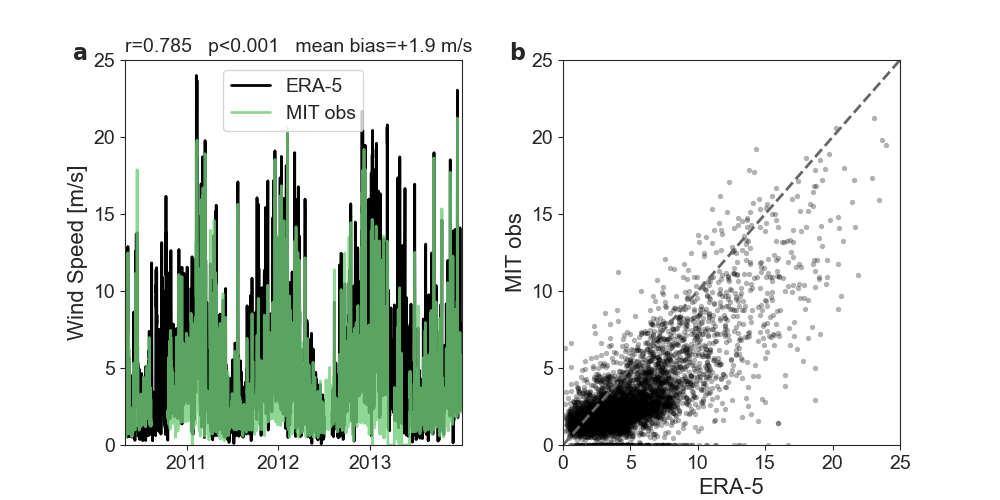

In [55]:
fig = plt.figure(figsize=(10,5))
 
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2,2], wspace=0.3)#,
#                          hspace=0.2, height_ratios=[1, 1])
 
a0 = fig.add_subplot(spec[0])
a0.tick_params(labelsize=14)
a0.plot(era5mitWindH.index,era5mitWindH['ERA5MitSpd'],color='k',linewidth=2,label='ERA-5')
a0.plot(era5mitWindH.index,era5mitWindH['MitWindSpd'],color='C5',linewidth=2,alpha=0.8,label='MIT obs')
a0.text(dt.date(2009, 10, 1),25,'$\\bf{a}$',fontsize=16)
a0.text(dt.date(2010, 5, 1),25.5,'r=0.785   p<0.001   mean bias=+1.9 m/s',fontsize=14)
a0.set_ylim(0.,25)
a0.set_xlim(dt.date(2010, 5, 1),dt.date(2013, 12, 31))
a0.set_xticks([dt.date(2011,1,1),dt.date(2012,1,1),dt.date(2013,1,1)])
a0.set_xticklabels(['2011','2012','2013'])
a0.set_ylabel('Wind Speed [m/s]',fontsize=16)
plt.legend(fontsize=14)

a1 = fig.add_subplot(spec[1])
a1.tick_params(labelsize=14)
a1.scatter(era5mitWindH['ERA5MitSpd'],era5mitWindH['MitWindSpd'],color='k',linewidth=0,alpha=0.3,s=15,label='_no legend_')
a1.plot([0,30],[0,30],color='0.4',linewidth=2,ls='--')
# a1.plot([0,30],[0*results.params[1]+results.params[0],30*results.params[1]+results.params[0]],color='C4',linewidth=3)
a1.text(-4,25,'$\\bf{b}$',fontsize=16)
a1.set_xlim(0,25)
a1.set_ylim(0,25)
a1.set_ylabel('MIT obs',fontsize=16)
a1.set_xlabel('ERA-5',fontsize=16)

plt.tight_layout()
plt.savefig(fig_dir + 'ERAvMITwindcomp20230114.jpg', format='jpg', dpi=400)
plt.show()